In [1]:
# Import main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import collections, re
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging

In [69]:
# Import description dataset
data = pd.read_csv("flipkart_com-ecommerce_sample_1050.csv", sep = ',')

# First view of the description dataset

In [70]:
# Code to display all columns and all texts
def set_pandas_display_options() -> None:
    display = pd.options.display
    display.max_columns = 20
    display.max_rows = 100
    display.max_colwidth = 300
    display.width = None
set_pandas_display_options()

In [71]:
# First view of dataset
data.head(20)

uniq_id            crawl_timestamp  \
0   55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1   7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2   64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3   d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4   6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   
5   893aa5ed55f7cff2eccea7758d7a86bd  2015-12-04 07:25:36 +0000   
6   f355cc1ccb08bd0d283ed979b7ee7515  2015-12-04 07:25:36 +0000   
7   dd0e3470a7e6ed76fd69c2da27721041  2015-12-04 07:25:36 +0000   
8   41384da51732c0b4df3de8f395714fbb  2015-12-04 07:25:36 +0000   
9   710ed5f2393a4b9e8823aa0029f71f93  2015-12-04 07:25:36 +0000   
10  920154acbe49d3202ed7d2ed2df1ea13  2015-12-04 07:25:36 +0000   
11  08452abdadb3db1e686b94a9c52fc7b6  2015-12-04 07:25:36 +0000   
12  1e8741b5ae27a513546c94b3f3312aee  2015-12-04 07:25:36 +0000   
13  189fa66a5fa6f08d2802a62ecf0be298  2015-12-04 07:25:36 +0000   
14  bbb8cdc5406ff60ff06ff64630f2ca47  2015-12-04 07:25:36 +0000   
15  1120bc768623572513df956172ffefeb  2015-12-04 07:25:36 +0000   
16  5479bb7028827d60000720a2c135976a  2015-12-04 07:25:36 +0000   
17  733aa1e801a139fa8dc7be9f0eff5ee0  2015-12-04 07:25:36 +0000   
18  62c35de4df27437d3597963fac55a8b6  2015-12-04 07:25:36 +0000   
19  33d97d63c037078cd3f08033966d6a88  2015-12-04 07:25:36 +0000   

                                                                                                                                          product_url  \
0                          http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z   
1                                                          http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH   
2                                                 http://www.flipkart.com/eurospa-cotton-terry-face-towel-set/p/itmeg6shbrpubhca?pid=BTWEG6SHXTDB2A2Y   
3                     http://www.flipkart.com/santosh-royal-fashion-cotton-printed-king-sized-double-bedsheet/p/itmejt9uaqahahuf?pid=BDSEJT9UQWHDUBH4   
4                               http://www.flipkart.com/jaipur-print-cotton-floral-king-sized-double-bedsheet/p/itmejthnwahrnt7v?pid=BDSEJTHNGWVGWWQU   
5                                         http://www.flipkart.com/maserati-time-r8851116001-analog-watch-boys/p/itmeayahfma4r9kp?pid=WATEAYAHJ8CUCAYM   
6                                         http://www.flipkart.com/camerii-wm64-elegance-analog-watch-men-boys/p/itme6y6duhfcummh?pid=WATE6Y6D2MZHWGBZ   
7                                          http://www.flipkart.com/t-star-uft-tsw-005-bk-br-analog-watch-boys/p/itmecffvcgfw8f9m?pid=WATECFFVGFZPAD3D   
8                                           http://www.flipkart.com/alfajr-wy16b-youth-digital-watch-men-boys/p/itmechfufumwbtnz?pid=WATECHFU4QGFQEJG   
9                            http://www.flipkart.com/tag-heuer-cau1116-ba0858-formula-1-analog-watch-boys-men/p/itmea6ug29cnhkdh?pid=WATEA6UGFGKZKDJC   
10                                       http://www.flipkart.com/calibro-sw-125-analog-digital-watch-men-boys/p/itmecgpstt9hdxjz?pid=WATECGPSDSFRHUSY   
11                                             http://www.flipkart.com/cartier-w6701005-analog-watch-boys-men/p/itmeak8svbtvm5hp?pid=WATEAK8SE2RUK7GM   
12                                          http://www.flipkart.com/lois-caron-lcs-4032-analog-watch-boys-men/p/itmed53ffczdxw7z?pid=WATED53FKKH4S8E4   
13                                               http://www.flipkart.com/titan-1639sl03-analog-watch-boys-men/p/itmedbvhefg7gm2b?pid=WATEDBVHQ6AJX7N9   
14  http://www.flipkart.com/srushti-art-jewelry-megnet-led-sport-blackred1-digital-watch-men-women-boys-girls/p/itmedfhaphf34yy8?pid=WATEDFHARG4YSPCA   
15                                        http://www.flipkart.com/escort-e-1700-906-blk-analog-watch-men-boys/p/itmecddd6gxm9weg?pid=WATECDDDQ7SFDD6K   
16                  

In [72]:
# Size of dataset
data.shape

(1050, 15)

In [73]:
# dtypes of features
data.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

In [74]:
# Percentage of missing values for each column
data.isna().mean()

uniq_id                    0.000000
crawl_timestamp            0.000000
product_url                0.000000
product_name               0.000000
product_category_tree      0.000000
pid                        0.000000
retail_price               0.000952
discounted_price           0.000952
image                      0.000000
is_FK_Advantage_product    0.000000
description                0.000000
product_rating             0.000000
overall_rating             0.000000
brand                      0.321905
product_specifications     0.000952
dtype: float64

In [75]:
# Number of missing values for each column
data.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

In [76]:
# Duplicates ?
print("duplicates in data : ", data.duplicated().sum())
print("duplicates in data['uniq_id'] : ", data.duplicated('uniq_id').sum())
print("duplicates in data['product_url'] : ", data.duplicated('product_url').sum())
print("duplicates in data['product_name'] : ", data.duplicated('product_name').sum())
print("duplicates in data['image'] : ", data.duplicated('image').sum())
print("duplicates in data['pid'] : ", data.duplicated('pid').sum())
print("duplicates in data['description'] : ", data.duplicated('description').sum())

duplicates in data :  0
duplicates in data['uniq_id'] :  0
duplicates in data['product_url'] :  0
duplicates in data['product_name'] :  0
duplicates in data['image'] :  0
duplicates in data['pid'] :  0
duplicates in data['description'] :  0


In [77]:
# Analysis of numeric features #1 : 'retail_price' & 'discounted_price'
data.describe()

retail_price  discounted_price
count    1049.000000       1049.000000
mean     2186.197331       1584.527169
std      7639.229411       7475.099680
min        35.000000         35.000000
25%       555.000000        340.000000
50%       999.000000        600.000000
75%      1999.000000       1199.000000
max    201000.000000     201000.000000

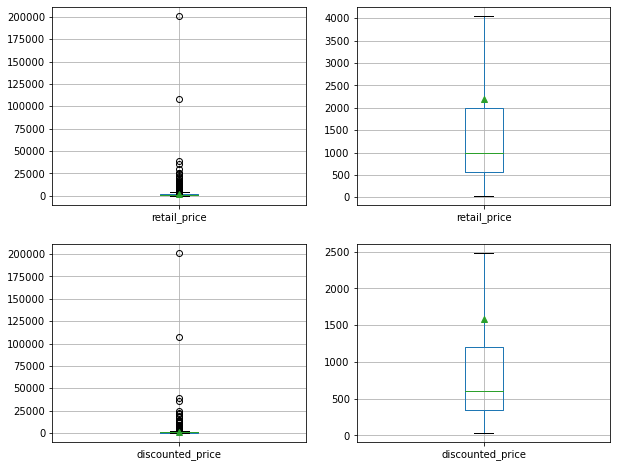

In [78]:
# Analysis of numeric features #2 : 'retail_price' & 'discounted_price'
# Boxplots with or without outliers
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

data.boxplot(column=["retail_price"], ax=axes[0, 0], showfliers=True, showmeans=True)
data.boxplot(column=["retail_price"], ax=axes[0, 1], showfliers=False, showmeans=True)
data.boxplot(column=["discounted_price"], ax=axes[1, 0], showfliers=True, showmeans=True)
data.boxplot(column=["discounted_price"], ax=axes[1, 1], showfliers=False, showmeans=True)

plt.show()

In [79]:
data.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [80]:
# Analysis of different features

# Number of different product_category_tree
print('number of different product_category_tree =', 
      len(data['product_category_tree'].unique().tolist()))
print('-------------------------------------------')

# Number of different product_rating
print('number of different product_rating =', 
      len(data['product_rating'].unique().tolist()))
print('-------------------------------------------')
      
# Number of different overall_rating
print('number of different overall_rating =', 
      len(data['overall_rating'].unique().tolist()))
print('-------------------------------------------')

# Number of different brand
print('number of different brand =', 
      len(data['brand'].unique().tolist()))

number of different product_category_tree = 642
-------------------------------------------
number of different product_rating = 27
-------------------------------------------
number of different overall_rating = 27
-------------------------------------------
number of different brand = 491


In [81]:
# Number of products by product_rating 
data['product_rating'].value_counts().to_dict()

{'No rating available': 889,
 '5': 43,
 '4': 21,
 '3': 12,
 '1': 10,
 '4.5': 10,
 '4.3': 9,
 '3.7': 8,
 '3.5': 8,
 '2': 6,
 '4.1': 4,
 '4.2': 4,
 '3.8': 3,
 '4.4': 3,
 '4.7': 3,
 '2.3': 3,
 '3.6': 3,
 '4.8': 2,
 '2.5': 1,
 '3.2': 1,
 '2.2': 1,
 '4.9': 1,
 '3.3': 1,
 '3.9': 1,
 '3.1': 1,
 '2.7': 1,
 '1.5': 1}

In [82]:
# Number of products by overall_rating  
data['overall_rating'].value_counts().to_dict()

{'No rating available': 889,
 '5': 43,
 '4': 21,
 '3': 12,
 '1': 10,
 '4.5': 10,
 '4.3': 9,
 '3.7': 8,
 '3.5': 8,
 '2': 6,
 '4.1': 4,
 '4.2': 4,
 '3.8': 3,
 '4.4': 3,
 '4.7': 3,
 '2.3': 3,
 '3.6': 3,
 '4.8': 2,
 '2.5': 1,
 '3.2': 1,
 '2.2': 1,
 '4.9': 1,
 '3.3': 1,
 '3.9': 1,
 '3.1': 1,
 '2.7': 1,
 '1.5': 1}

-> 'product_rating' and 'overall_rating' are the same feature

In [83]:
data.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [84]:
# Filter convenient features
data = data[['uniq_id',
            'product_name',
            'product_category_tree',
            'image',
            'description']]

In [85]:
# Create new column 'product_name_description'
data['product_name_description'] = (data['product_name']
                                    + data['description'])

In [86]:
data.head()

uniq_id  \
0  55b85ea15a1536d46b7190ad6fff8ce7   
1  7b72c92c2f6c40268628ec5f14c6d590   
2  64d5d4a258243731dc7bbb1eef49ad74   
3  d4684dcdc759dd9cdf41504698d737d8   
4  6325b6870c54cd47be6ebfbffa620ec7   

                                                      product_name  \
0       Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                       Sathiyas Cotton Bath Towel   
2                              Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4            Jaipur Print Cotton Floral King sized Double Bedsheet   

                                                                                                                       product_category_tree  \
0                           ["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]   
2   ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]   
3    ["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]   
4             ["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]   

                                  image  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3  d4684dcdc759dd9cdf41504698d737d8.jpg   
4  6325b6870c54cd47be6ebfbffa620ec7.jpg   

                                                                                                                                                                                                                                                                                                   description  \
0  Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester ...   
1  Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Col...   
2  Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft text...   
3  Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet Perfact for Wedding & Gifting,Specifications of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet (1 Bedsheet,2 Pillow Cover, Multicolor) General Brand SANTOSH ROYAL FASHION Machine Washa...   
4  Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print Cotton Floral King sized Double Bedsheet (1 bed sheet 2 pillow cover, White) Price: Rs. 998 This nice bed sheet made up of 100% cotton to give you comfort. This bed sheet is hand printed. This bedsheet...   

                                                                                                                                                                                                                                                                                      product_name_description  
0  Elegance Polyester Multicolor Abstract Eyelet Door CurtainKey Features of Elegance Polyester Multicolor

## Analysis of categories and creation of new categories

In [87]:
# Display all product_category_trees
list_cat_trees = data['product_category_tree'].unique().tolist()
list_cat_trees

['["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]',
 '["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]',
 '["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]',
 '["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]',
 '["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]',
 '["Watches >> Wrist Watches >> Maserati Time Wrist Watches"]',
 '["Watches >> Wrist Watches >> Camerii Wrist Watches"]',
 '["Watches >> Wrist Watches >> T STAR Wrist Watches"]',
 '["Watches >> Wrist Watches >> Alfajr Wrist Watches"]',
 '["Watches >> Wrist Watches >> TAG Heuer Wrist Watches"]',
 '["Watches >> Wrist Watches >> C

In [88]:
# Display number of different product_category_trees
len(list_cat_trees)

642

In [89]:
# Create 'first_category', 'second_category' and 'third_category' features from 'product_category_tree'
import re

# Save column index of 'product_category_tree'
index_product_category_tree = data.columns.get_loc('product_category_tree')
# Create new columns
data['first_category'] = 0
data['second_category'] = 0
data['third_category'] = 0
# Save column indexes of 'first_category', 'second_category' and 'third_category'
index_first_category = data.columns.get_loc('first_category')
index_second_category = data.columns.get_loc('second_category')
index_third_category = data.columns.get_loc('third_category')

# Add the appropriate category for each dataset row
for index in data.index:
    # Save string for each index of column 'product_category_tree'
    cat_tree = data.iloc[index, index_product_category_tree]
    # Save indexes of each ">" for each dataset row in list 'indices'
    indices = [i.start() for i in re.finditer(">", cat_tree)]
    # column 'first_categoy' : Keep only first_category (string before the first '>')
    first_cat = cat_tree[2:indices[0] - 1]
    data.iloc[index, index_first_category] = first_cat
    # column 'second_category : Keep only second_category 
    # (string before the third '>' or complete string if len(indices) == 2)
    if len(indices) == 2:
        data.iloc[index, index_second_category] = cat_tree[2:-2]
    else:
        second_cat = cat_tree[2:indices[2] - 1]
        data.iloc[index, index_second_category] = second_cat
    # column 'third_category : Keep third_category or second_category if there is no third_category
    # (string before the fifth '>' or complete string if len(indices) == 4 or 2)
    if 2 <= len(indices) <= 4:
        data.iloc[index, index_third_category] = cat_tree[2:-2]
    else:
        third_cat = cat_tree[2:indices[4] - 1]
        data.iloc[index, index_third_category] = third_cat

In [90]:
data

uniq_id  \
0     55b85ea15a1536d46b7190ad6fff8ce7   
1     7b72c92c2f6c40268628ec5f14c6d590   
2     64d5d4a258243731dc7bbb1eef49ad74   
3     d4684dcdc759dd9cdf41504698d737d8   
4     6325b6870c54cd47be6ebfbffa620ec7   
...                                ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc   
1046  fd6cbcc22efb6b761bd564c28928483c   
1047  5912e037d12774bb73a2048f35a00009   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6   
1049  f2f027ad6a6df617c9f125173da71e44   

                                                           product_name  \
0            Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                            Sathiyas Cotton Bath Towel   
2                                   Eurospa Cotton Terry Face Towel Set   
3       SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4                 Jaipur Print Cotton Floral King sized Double Bedsheet   
...                                                                 ...   
1045                     Oren Empower Extra Large Self Adhesive Sticker   
1046                             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker   
1048                            Wallmantra Medium Vinyl Sticker Sticker   
1049                                       Uberlyfe Large Vinyl Sticker   

                                                                                                                          product_category_tree  \
0                              ["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]   
2      ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]   
3       ["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]   
4                ["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]   
...                                                                                                                                         ...   
1045                                                                    ["Baby Care >> Baby & Kids Gifts >> Stickers >> Oren Empower Stickers"]   
1046                                                                      ["Baby Care >> Baby & Kids Gifts >> Stickers >> Wallmantra Stickers"]   
1047                                                                        ["Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers"]   
1048                                                                      ["Baby Care >> Baby & Kids Gifts >> Stickers >> Wallmantra Stickers"]   
1049                                                                        ["Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers"]   

                                     image  \
0     55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1     7b72c92c2f6c40268628ec5f14c6d590.jpg   
2     64d5d4a258243731dc7bbb1eef49ad74.jpg   
3     d4684dcdc759dd9cdf41504698d737d8.jpg   
4     6325b6870c54cd47be6ebfbffa620ec7.jpg   
...                                    ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047  5912e037d12774bb73a2048f35a00009.jpg   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1049  f2f027ad6a6df617c9f125173da71e44.jpg   

                                                                                                                                                                                                                                                                                                      description  

In [91]:
# Display the list of first_category listed in alphabetical order
list_1st_cat = data['first_category'].unique().tolist()
list_1st_cat.sort()
print(list_1st_cat)
print('number of first categories =', len(list_1st_cat))

['Baby Care', 'Beauty and Personal Care', 'Computers', 'Home Decor & Festive Needs', 'Home Furnishing', 'Kitchen & Dining', 'Watches']
number of first categories = 7


In [92]:
list_1st_cat

['Baby Care',
 'Beauty and Personal Care',
 'Computers',
 'Home Decor & Festive Needs',
 'Home Furnishing',
 'Kitchen & Dining',
 'Watches']

In [93]:
# Number of products by first_category
data.groupby('first_category')['first_category'].count()

first_category
Baby Care                     150
Beauty and Personal Care      150
Computers                     150
Home Decor & Festive Needs    150
Home Furnishing               150
Kitchen & Dining              150
Watches                       150
Name: first_category, dtype: int64

In [94]:
# Display the list of second_category listed in alphabetical order
list_2nd_cat = data['second_category'].unique().tolist()
list_2nd_cat.sort()
print(list_2nd_cat)
print('number of second categories =', len(list_2nd_cat))

['Baby Care >> Baby & Kids Gifts', 'Baby Care >> Baby Bath & Skin', 'Baby Care >> Baby Bedding', 'Baby Care >> Baby Grooming', 'Baby Care >> Diapering & Potty Training', 'Baby Care >> Feeding & Nursing', 'Baby Care >> Furniture & Furnishings', 'Baby Care >> Infant Wear', 'Baby Care >> Strollers & Activity Gear', 'Beauty and Personal Care >> Bath and Spa', 'Beauty and Personal Care >> Beauty Accessories', 'Beauty and Personal Care >> Body and Skin Care', 'Beauty and Personal Care >> Combos and Kits', 'Beauty and Personal Care >> Eye Care', 'Beauty and Personal Care >> Fragrances', 'Beauty and Personal Care >> Hair Care', 'Beauty and Personal Care >> Health Care', 'Beauty and Personal Care >> Makeup', "Beauty and Personal Care >> Men's Grooming", "Beauty and Personal Care >> Women's Hygiene", 'Computers >> Computer Components', 'Computers >> Computer Peripherals', 'Computers >> Laptop Accessories', 'Computers >> Laptops', 'Computers >> Network Components', 'Computers >> Software', 'Compu

In [95]:
list_2nd_cat

['Baby Care >> Baby & Kids Gifts',
 'Baby Care >> Baby Bath & Skin',
 'Baby Care >> Baby Bedding',
 'Baby Care >> Baby Grooming',
 'Baby Care >> Diapering & Potty Training',
 'Baby Care >> Feeding & Nursing',
 'Baby Care >> Furniture & Furnishings',
 'Baby Care >> Infant Wear',
 'Baby Care >> Strollers & Activity Gear',
 'Beauty and Personal Care >> Bath and Spa',
 'Beauty and Personal Care >> Beauty Accessories',
 'Beauty and Personal Care >> Body and Skin Care',
 'Beauty and Personal Care >> Combos and Kits',
 'Beauty and Personal Care >> Eye Care',
 'Beauty and Personal Care >> Fragrances',
 'Beauty and Personal Care >> Hair Care',
 'Beauty and Personal Care >> Health Care',
 'Beauty and Personal Care >> Makeup',
 "Beauty and Personal Care >> Men's Grooming",
 "Beauty and Personal Care >> Women's Hygiene",
 'Computers >> Computer Components',
 'Computers >> Computer Peripherals',
 'Computers >> Laptop Accessories',
 'Computers >> Laptops',
 'Computers >> Network Components',
 'Compu

In [96]:
# Number of products by second_category
data.groupby('second_category')['second_category'].count()

second_category
Baby Care >> Baby & Kids Gifts                                    15
Baby Care >> Baby Bath & Skin                                     14
Baby Care >> Baby Bedding                                         15
Baby Care >> Baby Grooming                                         4
Baby Care >> Diapering & Potty Training                            7
Baby Care >> Feeding & Nursing                                     8
Baby Care >> Furniture & Furnishings                               2
Baby Care >> Infant Wear                                          84
Baby Care >> Strollers & Activity Gear                             1
Beauty and Personal Care >> Bath and Spa                           7
Beauty and Personal Care >> Beauty Accessories                     1
Beauty and Personal Care >> Body and Skin Care                    15
Beauty and Personal Care >> Combos and Kits                       24
Beauty and Personal Care >> Eye Care                               2
Beauty and Persona

In [97]:
# Display the list of third_category listed in alphabetical order
list_3rd_cat = data['third_category'].unique().tolist()
list_3rd_cat.sort()
print(list_3rd_cat)
print('number of third categories =', len(list_3rd_cat))

['Baby Care >> Baby & Kids Gifts >> Decorations', 'Baby Care >> Baby & Kids Gifts >> Photo Frames', 'Baby Care >> Baby & Kids Gifts >> Stickers', 'Baby Care >> Baby Bath & Skin >> Baby Bath Towels', 'Baby Care >> Baby Bath & Skin >> Baby Body Wash', 'Baby Care >> Baby Bath & Skin >> Baby Shower Caps', 'Baby Care >> Baby Bedding >> Baby Bedsheets', 'Baby Care >> Baby Bedding >> Baby Blankets', 'Baby Care >> Baby Bedding >> Baby Mattresses', 'Baby Care >> Baby Bedding >> Baby Mosquito Nets', 'Baby Care >> Baby Bedding >> Baby Sleeping Bags', 'Baby Care >> Baby Grooming >> Baby Grooming Combos', 'Baby Care >> Baby Grooming >> Baby Massage Oils', 'Baby Care >> Baby Grooming >> Boreal Baby Grooming', 'Baby Care >> Baby Grooming >> Cotton Buds', 'Baby Care >> Diapering & Potty Training >> Changing Tables', 'Baby Care >> Diapering & Potty Training >> Diaper Bags', 'Baby Care >> Diapering & Potty Training >> Nappies & Cloth Diapers', 'Baby Care >> Feeding & Nursing >> Bibs & Hankies', 'Baby Ca

In [98]:
list_3rd_cat

['Baby Care >> Baby & Kids Gifts >> Decorations',
 'Baby Care >> Baby & Kids Gifts >> Photo Frames',
 'Baby Care >> Baby & Kids Gifts >> Stickers',
 'Baby Care >> Baby Bath & Skin >> Baby Bath Towels',
 'Baby Care >> Baby Bath & Skin >> Baby Body Wash',
 'Baby Care >> Baby Bath & Skin >> Baby Shower Caps',
 'Baby Care >> Baby Bedding >> Baby Bedsheets',
 'Baby Care >> Baby Bedding >> Baby Blankets',
 'Baby Care >> Baby Bedding >> Baby Mattresses',
 'Baby Care >> Baby Bedding >> Baby Mosquito Nets',
 'Baby Care >> Baby Bedding >> Baby Sleeping Bags',
 'Baby Care >> Baby Grooming >> Baby Grooming Combos',
 'Baby Care >> Baby Grooming >> Baby Massage Oils',
 'Baby Care >> Baby Grooming >> Boreal Baby Grooming',
 'Baby Care >> Baby Grooming >> Cotton Buds',
 'Baby Care >> Diapering & Potty Training >> Changing Tables',
 'Baby Care >> Diapering & Potty Training >> Diaper Bags',
 'Baby Care >> Diapering & Potty Training >> Nappies & Cloth Diapers',
 'Baby Care >> Feeding & Nursing >> Bibs & 

In [99]:
# Number of products by third_category
data.groupby('third_category')['third_category'].count()

third_category
Baby Care >> Baby & Kids Gifts >> Decorations               1
Baby Care >> Baby & Kids Gifts >> Photo Frames              4
Baby Care >> Baby & Kids Gifts >> Stickers                 10
Baby Care >> Baby Bath & Skin >> Baby Bath Towels          11
Baby Care >> Baby Bath & Skin >> Baby Body Wash             2
                                                           ..
Watches >> Wrist Watches >> Vizion Wrist Watches            1
Watches >> Wrist Watches >> Xemex Wrist Watches             1
Watches >> Wrist Watches >> Yves Bertelin Wrist Watches     1
Watches >> Wrist Watches >> fastrack Wrist Watches          1
Watches >> Wrist Watches >> palito Wrist Watches            3
Name: third_category, Length: 243, dtype: int64

# Bag-of-words

In [100]:
# Count words in column 'product_name' without any cleaning
data['product_name'] = data['product_name'].astype(str)
import collections, re
pd.Series([y for x in data['product_name'].values.flatten() for y in x.split()]).value_counts().to_dict()

{'-': 285,
 'For': 156,
 'Watch': 150,
 'Set': 128,
 'Analog': 127,
 'cm': 109,
 'Showpiece': 104,
 'Baby': 92,
 'Combo': 90,
 'Ceramic': 78,
 'Mug': 76,
 '&': 71,
 'Men': 63,
 'USB': 60,
 'Cotton': 54,
 'Women': 49,
 "Girl's": 48,
 'Single': 45,
 'Double': 40,
 'Laptop': 38,
 'Abstract': 34,
 'Printed': 29,
 "Boy's": 29,
 'Multicolor': 29,
 'and': 28,
 '6': 28,
 'of': 28,
 'Blue': 27,
 'Floral': 27,
 'Design': 27,
 'Blanket': 26,
 'Prithish': 26,
 'L': 25,
 'Cell': 25,
 'Cover': 24,
 'with': 24,
 'Sticker': 24,
 'Maxima': 23,
 'Sonata': 23,
 'Kadhai': 22,
 'Towel': 22,
 'With': 22,
 'Battery': 22,
 'Dress': 22,
 'Rockmantra': 22,
 'Quilts': 21,
 'Light': 21,
 'Polyester': 21,
 'Gold': 21,
 'Comforters': 21,
 'Curtain': 20,
 'Black': 19,
 'Eyelet': 19,
 'Led': 19,
 'Digital': 18,
 'Bath': 18,
 'Boys': 18,
 'Gift': 17,
 'Boys,': 17,
 'Cushions': 17,
 '4': 16,
 'Router': 16,
 'Door': 16,
 'Mini': 15,
 'Men,': 15,
 'Red': 15,
 'Cream': 14,
 'Jewellery': 14,
 'Wall': 14,
 'Kit': 14,
 'HP':

In [101]:
# Count words in column 'description' without any cleaning
data['description'] = data['description'].astype(str)
import collections, re
pd.Series([y for x in data['description'].values.flatten() for y in x.split()]).value_counts().to_dict()

{'of': 1656,
 'and': 1167,
 'the': 1013,
 'to': 982,
 '-': 910,
 'for': 819,
 'in': 748,
 'Only': 717,
 'at': 701,
 'with': 688,
 'your': 600,
 'For': 584,
 'Rs.': 584,
 'Buy': 566,
 'Genuine': 564,
 'a': 555,
 'is': 544,
 'Replacement': 518,
 '&': 492,
 '30': 486,
 'cm': 473,
 'Day': 473,
 'On': 425,
 'Products.': 413,
 'Free': 403,
 'on': 402,
 'Shipping.': 381,
 'Cash': 381,
 'Delivery!': 381,
 'Flipkart.com.': 379,
 '1': 365,
 'from': 352,
 'Price:': 342,
 'The': 338,
 'Features': 327,
 'Guarantee.': 318,
 'Watch': 292,
 'Baby': 287,
 'In': 287,
 'General': 285,
 'Type': 281,
 'Package': 268,
 'Box': 265,
 'Sales': 261,
 'you': 257,
 'this': 254,
 'Analog': 253,
 'Number': 244,
 'Pack': 243,
 'Set': 237,
 'Cotton': 218,
 'Warranty': 217,
 'Key': 215,
 'Model': 215,
 'best': 213,
 'Material': 212,
 'It': 207,
 'Color': 206,
 'Brand': 204,
 'it': 198,
 'Showpiece': 198,
 'are': 191,
 'be': 188,
 'Details': 188,
 'prices': 183,
 'online.': 183,
 'Ceramic': 183,
 'shipping': 183,
 'cas

In [102]:
# Count words in column 'product_name_description' without any cleaning
data['product_name_description'] = data['product_name_description'].astype(str)
import collections, re
pd.Series([y for x in data['product_name_description'].values.flatten() for y in x.split()]).value_counts().to_dict()

{'of': 1684,
 'and': 1195,
 '-': 1195,
 'the': 1014,
 'to': 982,
 'for': 829,
 'in': 749,
 'For': 740,
 'Only': 717,
 'with': 712,
 'at': 701,
 'your': 600,
 'Rs.': 584,
 'Genuine': 564,
 '&': 563,
 'a': 555,
 'is': 544,
 'Replacement': 527,
 '30': 488,
 'cm': 481,
 'Day': 475,
 'Watch': 436,
 'On': 428,
 'Products.': 413,
 'Free': 407,
 'on': 404,
 'Cash': 381,
 'Shipping.': 381,
 'Delivery!': 381,
 'Analog': 380,
 'Baby': 379,
 'Flipkart.com.': 379,
 '1': 373,
 'from': 352,
 'The': 350,
 'Price:': 342,
 'Features': 327,
 'Guarantee.': 318,
 'Showpiece': 302,
 'In': 291,
 'General': 285,
 'Type': 281,
 'Box': 273,
 'Cotton': 272,
 'Package': 268,
 'Set': 263,
 'Ceramic': 261,
 'Sales': 261,
 'you': 257,
 'this': 254,
 'Pack': 250,
 'Number': 244,
 'Combo': 229,
 'USB': 228,
 'Buy': 226,
 'Warranty': 217,
 'Color': 216,
 'Model': 215,
 'best': 213,
 'Material': 212,
 'It': 207,
 'Brand': 204,
 "Girl's": 203,
 'it': 198,
 'are': 191,
 'Details': 188,
 'be': 188,
 'India': 184,
 'deliver

## Cleaning of the text in columns 'product_name', 'description' & 'product_name_description'

In [103]:
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ').replace('.', ' . ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
# Combining list of usual stopwords in english and punctuation
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')', '!']

def stop_word_filter_fct(list_words) :
    # First filter : delete words in stop_w
    filtered_w = [w for w in list_words if not w in stop_w]
    # Second filter : delete words of 1 or 2 caracters
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case and alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@"))
                                       and (not w.startswith("http"))]
    return lw

from collections import Counter
# Remove duplicated word in the same sentence
def remov_duplicates(input):
    # split input string separated by space
    input = input.split(" ")
    # now create dictionary using counter method
    # which will have strings as key and their
    # frequencies as value
    UniqW = Counter(input)
    # joins two adjacent elements in iterable way
    s = " ".join(UniqW.keys())
    return s

# Remove digits from words in list
def remove(input):
    # using join and is digit 
    # to remove numeric digits from string
    res = ''.join([i for i in input if not i.isdigit()])
    return res

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    lw = lower_start_fct(word_tokens)
    sw = stop_word_filter_fct(lw)
    # Remove extra spaces, tabs, and line breaks
    transf_desc_text = ' '.join(sw)
    # Remove numbers
    transf_desc_text = re.sub(r"\b[0-9]+\b\s*", "", transf_desc_text)
    # Remove digits from words
    transf_desc_text = remove(transf_desc_text)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    lw = lower_start_fct(word_tokens)
    sw = stop_word_filter_fct(lw)
    lem_w = lemma_fct(sw)
    # Remove extra spaces, tabs, and line breaks
    transf_desc_text = ' '.join(lem_w)
    # Remove numbers
    transf_desc_text = re.sub(r"\b[0-9]+\b\s*", "", transf_desc_text)
    # Remove digits from words
    transf_desc_text = remove(transf_desc_text)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\33624\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\33624\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [104]:
# Create new columns by applying transform_bow_fct, transform_bow_lem_fct & transform_dl_fct
data['product_name_bow'] = data['product_name'].apply(lambda x : transform_bow_fct(x))
data['product_name_bow_lem'] = data['product_name'].apply(lambda x : transform_bow_lem_fct(x))
data['product_name_dl'] = data['product_name'].apply(lambda x : transform_dl_fct(x))
data['description_bow'] = data['description'].apply(lambda x : transform_bow_fct(x))
data['description_bow_lem'] = data['description'].apply(lambda x : transform_bow_lem_fct(x))
data['description_dl'] = data['description'].apply(lambda x : transform_dl_fct(x))
data['product_name_description_bow'] = data['product_name_description'].apply(lambda x : transform_bow_fct(x))
data['product_name_description_bow_lem'] = data['product_name_description'].apply(lambda x : transform_bow_lem_fct(x))
data['product_name_description_dl'] = data['product_name_description'].apply(lambda x : transform_dl_fct(x))
data.shape

(1050, 18)

In [105]:
data

uniq_id  \
0     55b85ea15a1536d46b7190ad6fff8ce7   
1     7b72c92c2f6c40268628ec5f14c6d590   
2     64d5d4a258243731dc7bbb1eef49ad74   
3     d4684dcdc759dd9cdf41504698d737d8   
4     6325b6870c54cd47be6ebfbffa620ec7   
...                                ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc   
1046  fd6cbcc22efb6b761bd564c28928483c   
1047  5912e037d12774bb73a2048f35a00009   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6   
1049  f2f027ad6a6df617c9f125173da71e44   

                                                           product_name  \
0            Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                            Sathiyas Cotton Bath Towel   
2                                   Eurospa Cotton Terry Face Towel Set   
3       SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4                 Jaipur Print Cotton Floral King sized Double Bedsheet   
...                                                                 ...   
1045                     Oren Empower Extra Large Self Adhesive Sticker   
1046                             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker   
1048                            Wallmantra Medium Vinyl Sticker Sticker   
1049                                       Uberlyfe Large Vinyl Sticker   

                                                                                                                          product_category_tree  \
0                              ["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]   
2      ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]   
3       ["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]   
4                ["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]   
...                                                                                                                                         ...   
1045                                                                    ["Baby Care >> Baby & Kids Gifts >> Stickers >> Oren Empower Stickers"]   
1046                                                                      ["Baby Care >> Baby & Kids Gifts >> Stickers >> Wallmantra Stickers"]   
1047                                                                        ["Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers"]   
1048                                                                      ["Baby Care >> Baby & Kids Gifts >> Stickers >> Wallmantra Stickers"]   
1049                                                                        ["Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers"]   

                                     image  \
0     55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1     7b72c92c2f6c40268628ec5f14c6d590.jpg   
2     64d5d4a258243731dc7bbb1eef49ad74.jpg   
3     d4684dcdc759dd9cdf41504698d737d8.jpg   
4     6325b6870c54cd47be6ebfbffa620ec7.jpg   
...                                    ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc.jpg   
1046  fd6cbcc22efb6b761bd564c28928483c.jpg   
1047  5912e037d12774bb73a2048f35a00009.jpg   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg   
1049  f2f027ad6a6df617c9f125173da71e44.jpg   

                                                                                                                                                                                                                                                                                                      description  

In [106]:
data['first_category'].unique().tolist()

['Home Furnishing',
 'Baby Care',
 'Watches',
 'Home Decor & Festive Needs',
 'Kitchen & Dining',
 'Beauty and Personal Care',
 'Computers']

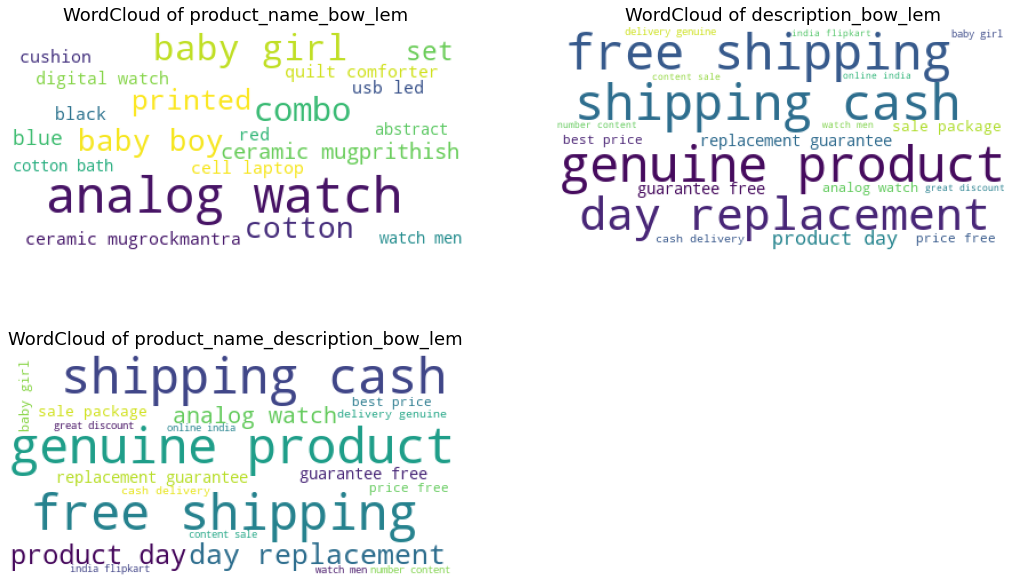

In [109]:
# Comparison of wordclouds of product_name_bow_lem, description_bow_lem & product_name_description_bow_lem
from PIL import Image
from wordcloud import WordCloud

list_feat_comp = ['product_name_bow_lem', 'description_bow_lem', 
                  'product_name_description_bow_lem']

plt.figure(figsize = (18,6))
plt.subplots_adjust(top = 1.5)

for index, feat in enumerate(list_feat_comp):    
    text = data[feat].sum()
    plt.subplot(2,2,index+1)
    wordcloud = WordCloud(background_color = 'white', max_words = 20).generate(text)
    plt.title('WordCloud of '+ feat, size = 18)
    plt.imshow(wordcloud)
    plt.axis("off")

plt.show()

In [110]:
data.columns

Index(['uniq_id', 'product_name', 'product_category_tree', 'image',
       'description', 'product_name_description', 'first_category',
       'second_category', 'third_category', 'product_name_bow',
       'product_name_bow_lem', 'product_name_dl', 'description_bow',
       'description_bow_lem', 'description_dl', 'product_name_description_bow',
       'product_name_description_bow_lem', 'product_name_description_dl'],
      dtype='object')

In [111]:
# Comparison of wordclouds of product_name, product_name_bow, product_name_bow_lem & product_name_dl
list_feat_comp = ['product_name', 'product_name_bow', 
                  'product_name_bow_lem', 'product_name_dl']

plt.figure(figsize = (18,6))
plt.subplots_adjust(top = 1.5)

for index, feat in enumerate(list_feat_comp):    
    text = data[feat].sum()
    plt.subplot(2,2,index+1)
    wordcloud = WordCloud(background_color = 'white', max_words = 20).generate(text)
    plt.title('WordCloud of '+ feat, size = 18)
    plt.imshow(wordcloud)
    plt.axis("off")

plt.show()

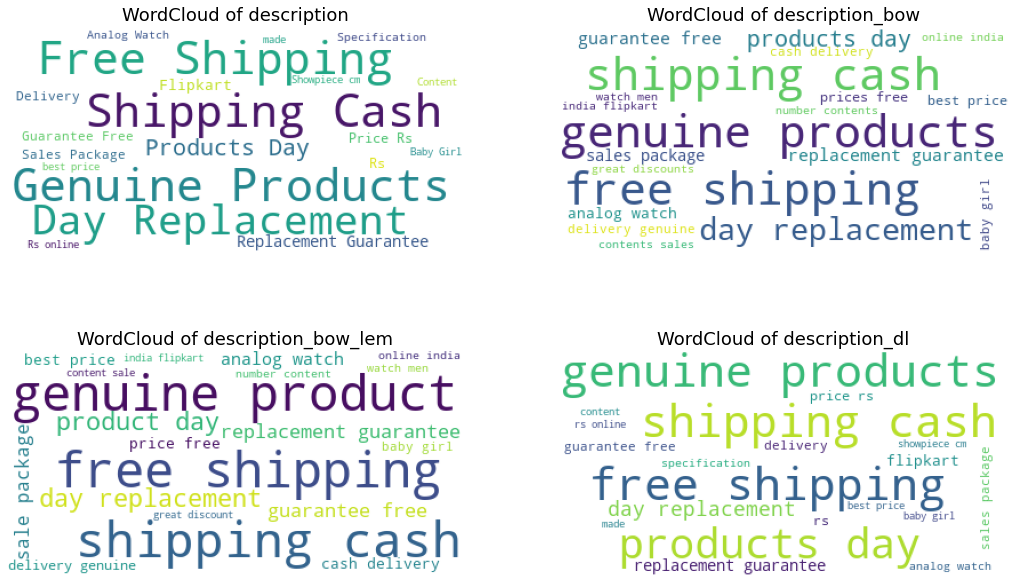

In [112]:
# Comparison of wordclouds of description, description_bow, description_bow_lem & description_dl
list_feat_comp = ['description', 'description_bow', 
                  'description_bow_lem', 'description_dl']

plt.figure(figsize = (18,6))
plt.subplots_adjust(top = 1.5)

for index, feat in enumerate(list_feat_comp):    
    text = data[feat].sum()
    plt.subplot(2,2,index+1)
    wordcloud = WordCloud(background_color = 'white', max_words = 20).generate(text)
    plt.title('WordCloud of '+ feat, size = 18)
    plt.imshow(wordcloud)
    plt.axis("off")

plt.show()

In [ ]:
# Create a dataframe for each first_category
data_home_furn = data.loc[data['first_category'] == 'Home Furnishing']
data_baby = data.loc[data['first_category'] == 'Baby Care']
data_watches = data.loc[data['first_category'] == 'Watches']
data_home_decor = data.loc[data['first_category'] == 'Home Decor & Festive Needs']
data_kitchen = data.loc[data['first_category'] == 'Kitchen & Dining']
data_beauty = data.loc[data['first_category'] == 'Beauty and Personal Care']
data_computers = data.loc[data['first_category'] == 'Computers']

In [115]:
# Comparison of wordclouds of product_name_bow_lem for different categories
list_data_comp = [data_home_furn, data_baby, data_watches, data_home_decor,
                 data_kitchen, data_beauty, data_computers]

plt.figure(figsize = (18,12))
plt.subplots_adjust(top = 1.5)

for index, data_cat in enumerate(list_data_comp):    
    text = data_cat['product_name_bow_lem'].sum()
    plt.subplot(4,2,index+1)
    wordcloud = WordCloud(background_color = 'white', max_words = 20).generate(text)
    plt.imshow(wordcloud)
    plt.title('WordCloud of product_name_bow_lem for different categories', size = 15)
    plt.axis("off")

plt.show()

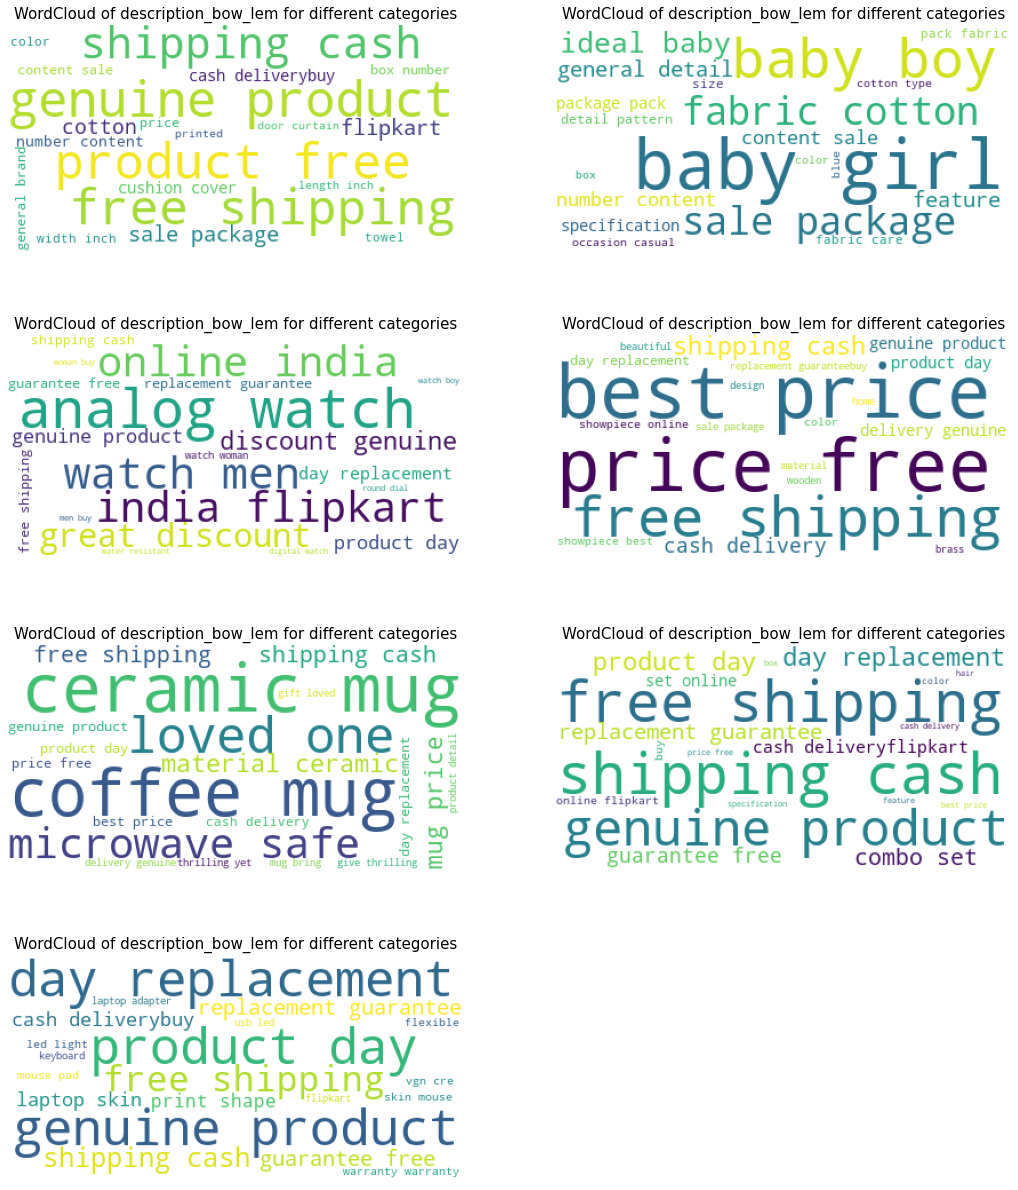

In [116]:
# Comparison of wordclouds of description_bow_lem for different categories
list_data_comp = [data_home_furn, data_baby, data_watches, data_home_decor,
                 data_kitchen, data_beauty, data_computers]

plt.figure(figsize = (18,12))
plt.subplots_adjust(top = 1.5)

for index, data_cat in enumerate(list_data_comp):    
    text = data_cat['description_bow_lem'].sum()
    plt.subplot(4,2,index+1)
    wordcloud = WordCloud(background_color = 'white', max_words = 20).generate(text)
    plt.imshow(wordcloud)
    plt.title('WordCloud of description_bow_lem for different categories', size = 15)
    plt.axis("off")

plt.show()

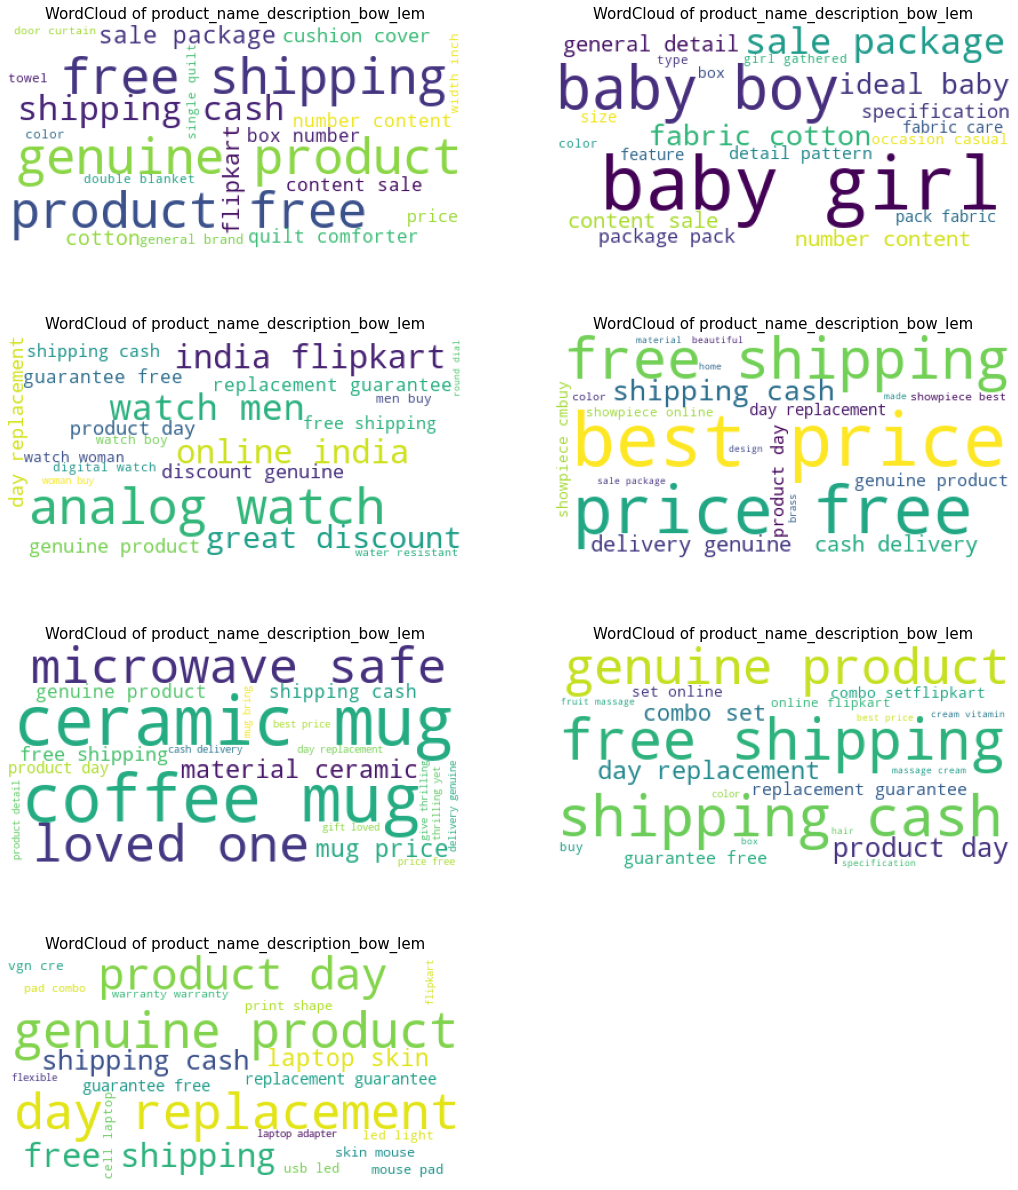

In [117]:
# Comparison of wordclouds of product_name_description_bow_lem for different categories
list_data_comp = [data_home_furn, data_baby, data_watches, data_home_decor,
                 data_kitchen, data_beauty, data_computers]

plt.figure(figsize = (18,12))
plt.subplots_adjust(top = 1.5)

for index, data_cat in enumerate(list_data_comp):    
    text = data_cat['product_name_description_bow_lem'].sum()
    plt.subplot(4,2,index+1)
    wordcloud = WordCloud(background_color = 'white', max_words = 20).generate(text)
    plt.imshow(wordcloud)
    plt.title('WordCloud of product_name_description_bow_lem', size = 15)
    plt.axis("off")

plt.show()

# Bag of word - CountVectorizer

In [118]:
# Create labels for first_category
l_cat = list(set(data['first_category']))
print("catégories : ", l_cat)
y_cat_num = [(6-l_cat.index(data.iloc[i]['first_category'])) for i in range(len(data))]

catégories :  ['Kitchen & Dining', 'Beauty and Personal Care', 'Home Decor & Festive Needs', 'Watches', 'Baby Care', 'Computers', 'Home Furnishing']


In [119]:
l_cat

['Kitchen & Dining',
 'Beauty and Personal Care',
 'Home Decor & Festive Needs',
 'Watches',
 'Baby Care',
 'Computers',
 'Home Furnishing']

In [120]:
y_cat_num

[0,
 2,
 2,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 4,
 6,
 6,
 0,
 2,
 0,
 2,
 5,
 6,
 6,
 6,
 1,
 6,
 5,
 6,
 1,
 6,
 1,
 1,
 1,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 6,
 6,
 2,
 0,
 6,
 6,
 6,
 0,
 6,
 2,
 2,
 2,
 5,
 5,
 0,
 2,
 4,
 4,
 2,
 2,
 4,
 4,
 6,
 1,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 4,
 4,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 4,
 2,
 6,
 2,
 1,
 4,
 2,
 4,
 1,
 0,
 2,
 1,
 4,
 5,
 5,
 5,
 5,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 4,
 4,
 4,
 4,
 6,
 4,
 6,
 4,
 4,
 2,
 4,
 6,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 6,
 6,
 4,
 6,
 4,
 2,
 4,
 4,
 6,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 6,
 6,
 4,
 4,
 6,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 4,
 6,


In [141]:
# create bag of words (CountVectorizer) for 'description_bow_lem' feature
from sklearn.feature_extraction.text import CountVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'description_bow_lem'
cv_fit = cvect.fit(data[feat])

cv_transform = cvect.transform(data[feat])

In [181]:
import time

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features, perplexity) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=perplexity, n_iter=2000,
                         init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(18,7))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie", fontsize = 9)
    plt.title('Représentation des descriptions par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters", fontsize = 10)
    plt.title('Représentation des descriptions par clusters')
    
    plt.show()
    print("ARI : ", ARI)

In [142]:
# Execute countvectorizer model with perplexity from 1 to 50 for 'description_bow_lem' feature
ARI_des_bow_lem = []

for perplexity in range(1, 51):
    ARI, X_tsne, labels = ARI_fct(cv_transform, perplexity)
    ARI_des_bow_lem.append(ARI)

ARI :  0.1313 time :  5.0
ARI :  0.2242 time :  5.0
ARI :  0.2969 time :  6.0
ARI :  0.3524 time :  6.0
ARI :  0.3195 time :  6.0
ARI :  0.3361 time :  6.0
ARI :  0.3563 time :  6.0
ARI :  0.3657 time :  6.0
ARI :  0.3717 time :  6.0
ARI :  0.3333 time :  6.0
ARI :  0.323 time :  6.0
ARI :  0.3669 time :  6.0
ARI :  0.3593 time :  6.0
ARI :  0.3663 time :  6.0
ARI :  0.3348 time :  7.0
ARI :  0.3799 time :  6.0
ARI :  0.4055 time :  6.0
ARI :  0.4105 time :  6.0
ARI :  0.3754 time :  6.0
ARI :  0.4027 time :  6.0
ARI :  0.4494 time :  6.0
ARI :  0.4087 time :  6.0
ARI :  0.3831 time :  7.0
ARI :  0.368 time :  8.0
ARI :  0.3693 time :  8.0
ARI :  0.3687 time :  8.0
ARI :  0.3993 time :  8.0
ARI :  0.4033 time :  8.0
ARI :  0.3599 time :  8.0
ARI :  0.3884 time :  8.0
ARI :  0.389 time :  8.0
ARI :  0.3859 time :  8.0
ARI :  0.3443 time :  8.0
ARI :  0.3787 time :  8.0
ARI :  0.3682 time :  9.0
ARI :  0.3956 time :  9.0
ARI :  0.3667 time :  9.0
ARI :  0.3878 time :  9.0
ARI :  0.3752 t

In [143]:
fig, ax = plt.subplots(figsize = (18,9))

sns.set_theme(style="darkgrid")

x = range(1, 51)
y1 = ARI_des_bow_lem

# Plot the different metrics
ax.plot(x, y1, color = 'green', label = 'ARI_des_bow_lem')

plt.yticks(size = 18)
plt.xticks(np.arange(min(range(1, 51)), max(range(1, 51)), 2.0), size = 18)

plt.xlabel("Perplexity", size = 20)
plt.ylabel("Adjusted_Rand_Index", size = 20)

plt.title('Adjusted_Rand_Index by Perplexity', size = 25)

leg = ax.legend(fontsize = 20)

plt.show()

In [144]:
# create bag of words (CountVectorizer) for 'product_name_bow_lem' feature
from sklearn.feature_extraction.text import CountVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'product_name_bow_lem'
cv_fit = cvect.fit(data[feat])

cv_transform = cvect.transform(data[feat])

In [145]:
# Execute countvectorizer model with perplexity from 1 to 50 for 'product_name_bow_lem' feature
ARI_prod_bow_lem = []

for perplexity in range(1, 51):
    ARI, X_tsne, labels = ARI_fct(cv_transform, perplexity)
    ARI_prod_bow_lem.append(ARI)

ARI :  0.1368 time :  5.0
ARI :  0.2562 time :  5.0
ARI :  0.325 time :  5.0
ARI :  0.3273 time :  5.0
ARI :  0.3576 time :  5.0
ARI :  0.3759 time :  5.0
ARI :  0.3379 time :  6.0
ARI :  0.3146 time :  5.0
ARI :  0.3765 time :  6.0
ARI :  0.377 time :  6.0
ARI :  0.3525 time :  5.0
ARI :  0.4144 time :  6.0
ARI :  0.3302 time :  6.0
ARI :  0.3457 time :  6.0
ARI :  0.4314 time :  7.0
ARI :  0.3908 time :  6.0
ARI :  0.4134 time :  6.0
ARI :  0.384 time :  6.0
ARI :  0.3783 time :  6.0
ARI :  0.3763 time :  6.0
ARI :  0.3684 time :  6.0
ARI :  0.3726 time :  6.0
ARI :  0.3813 time :  6.0
ARI :  0.386 time :  7.0
ARI :  0.3777 time :  7.0
ARI :  0.3398 time :  8.0
ARI :  0.3872 time :  8.0
ARI :  0.3432 time :  8.0
ARI :  0.3543 time :  8.0
ARI :  0.3384 time :  8.0
ARI :  0.359 time :  8.0
ARI :  0.3762 time :  8.0
ARI :  0.3572 time :  8.0
ARI :  0.3397 time :  9.0
ARI :  0.3806 time :  8.0
ARI :  0.3687 time :  8.0
ARI :  0.3575 time :  8.0
ARI :  0.3608 time :  8.0
ARI :  0.3609 tim

In [147]:
fig, ax = plt.subplots(figsize = (18,9))

sns.set_theme(style="darkgrid")

x = range(1, 51)
y1 = ARI_des_bow_lem
y2 = ARI_prod_bow_lem

# Plot the different metrics
ax.plot(x, y1, color = 'green', label = 'ARI_des_bow_lem')
ax.plot(x, y2, color = 'brown', label = 'ARI_prod_bow_lem')

plt.yticks(size = 18)
plt.xticks(np.arange(min(range(1, 51)), max(range(1, 51)), 2.0), size = 18)

plt.xlabel("Perplexity", size = 20)
plt.ylabel("Adjusted_Rand_Index", size = 20)

plt.title('Adjusted_Rand_Index by Perplexity', size = 25)

leg = ax.legend(fontsize = 20)

plt.show()

In [148]:
# create bag of words (CountVectorizer) for 'product_name_description_bow_lem' feature
from sklearn.feature_extraction.text import CountVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'product_name_description_bow_lem'
cv_fit = cvect.fit(data[feat])

cv_transform = cvect.transform(data[feat])

In [149]:
# Execute countvectorizer model with perplexity from 1 to 50 for 'product_name_description_bow_lem' feature
ARI_prod_des_bow_lem = []

for perplexity in range(1, 51):
    ARI, X_tsne, labels = ARI_fct(cv_transform, perplexity)
    ARI_prod_des_bow_lem.append(ARI)

ARI :  0.0829 time :  5.0
ARI :  0.2077 time :  5.0
ARI :  0.2919 time :  6.0
ARI :  0.3251 time :  6.0
ARI :  0.3304 time :  6.0
ARI :  0.4214 time :  6.0
ARI :  0.4119 time :  6.0
ARI :  0.3569 time :  6.0
ARI :  0.3814 time :  6.0
ARI :  0.4001 time :  6.0
ARI :  0.3936 time :  6.0
ARI :  0.4612 time :  6.0
ARI :  0.3894 time :  7.0
ARI :  0.4084 time :  6.0
ARI :  0.4087 time :  6.0
ARI :  0.4343 time :  7.0
ARI :  0.3794 time :  6.0
ARI :  0.3874 time :  7.0
ARI :  0.4572 time :  7.0
ARI :  0.3795 time :  7.0
ARI :  0.3959 time :  7.0
ARI :  0.3728 time :  7.0
ARI :  0.3797 time :  8.0
ARI :  0.4456 time :  8.0
ARI :  0.4443 time :  8.0
ARI :  0.3918 time :  8.0
ARI :  0.4307 time :  8.0
ARI :  0.413 time :  8.0
ARI :  0.4211 time :  8.0
ARI :  0.4417 time :  8.0
ARI :  0.4017 time :  9.0
ARI :  0.4351 time :  9.0
ARI :  0.4291 time :  9.0
ARI :  0.4303 time :  9.0
ARI :  0.4328 time :  9.0
ARI :  0.4449 time :  9.0
ARI :  0.3744 time :  9.0
ARI :  0.3831 time :  10.0
ARI :  0.395

In [150]:
fig, ax = plt.subplots(figsize = (18,9))

sns.set_theme(style="darkgrid")

x = range(1, 51)
y1 = ARI_des_bow_lem
y2 = ARI_prod_bow_lem
y3 = ARI_prod_des_bow_lem

# Plot the different metrics
ax.plot(x, y1, color = 'green', label = 'ARI_des_bow_lem')
ax.plot(x, y2, color = 'brown', label = 'ARI_prod_bow_lem')
ax.plot(x, y3, color = 'steelblue', label = 'ARI_prod_des_bow_lem')

plt.yticks(size = 18)
plt.xticks(np.arange(min(range(1, 51)), max(range(1, 51)), 2.0), size = 18)

plt.xlabel("Perplexity", size = 20)
plt.ylabel("Adjusted_Rand_Index", size = 20)

plt.title('Adjusted_Rand_Index by Perplexity', size = 25)

leg = ax.legend(fontsize = 20)

plt.show()

In [152]:
# create bag of words (CountVectorizer) for 'product_name_description_bow_lem' feature
# fitted on product_name_bow_lem
from sklearn.feature_extraction.text import CountVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)

cv_fit = cvect.fit(data['product_name_bow_lem'])

cv_transform = cvect.transform(data['product_name_description_bow_lem'])

In [153]:
# Execute countvectorizer model with perplexity from 1 to 50 for 'product_name_description_bow_lem' feature
# fitted on product_name_bow_lem
ARI_prod_des_bow_lem_fit_prod = []

for perplexity in range(1, 51):
    ARI, X_tsne, labels = ARI_fct(cv_transform, perplexity)
    ARI_prod_des_bow_lem_fit_prod.append(ARI)

ARI :  0.096 time :  5.0
ARI :  0.2407 time :  5.0
ARI :  0.2849 time :  6.0
ARI :  0.3355 time :  5.0
ARI :  0.373 time :  5.0
ARI :  0.3476 time :  6.0
ARI :  0.3658 time :  6.0
ARI :  0.369 time :  6.0
ARI :  0.416 time :  6.0
ARI :  0.3975 time :  6.0
ARI :  0.3893 time :  6.0
ARI :  0.3888 time :  6.0
ARI :  0.4476 time :  6.0
ARI :  0.3747 time :  6.0
ARI :  0.3598 time :  6.0
ARI :  0.428 time :  6.0
ARI :  0.4165 time :  6.0
ARI :  0.4082 time :  7.0
ARI :  0.4287 time :  6.0
ARI :  0.4586 time :  7.0
ARI :  0.4037 time :  6.0
ARI :  0.4085 time :  7.0
ARI :  0.4098 time :  8.0
ARI :  0.4031 time :  8.0
ARI :  0.4201 time :  8.0
ARI :  0.417 time :  8.0
ARI :  0.4184 time :  8.0
ARI :  0.4041 time :  8.0
ARI :  0.3901 time :  8.0
ARI :  0.4017 time :  8.0
ARI :  0.4151 time :  8.0
ARI :  0.4405 time :  8.0
ARI :  0.4232 time :  9.0
ARI :  0.4107 time :  9.0
ARI :  0.3927 time :  9.0
ARI :  0.399 time :  9.0
ARI :  0.3835 time :  10.0
ARI :  0.4183 time :  9.0
ARI :  0.4051 time

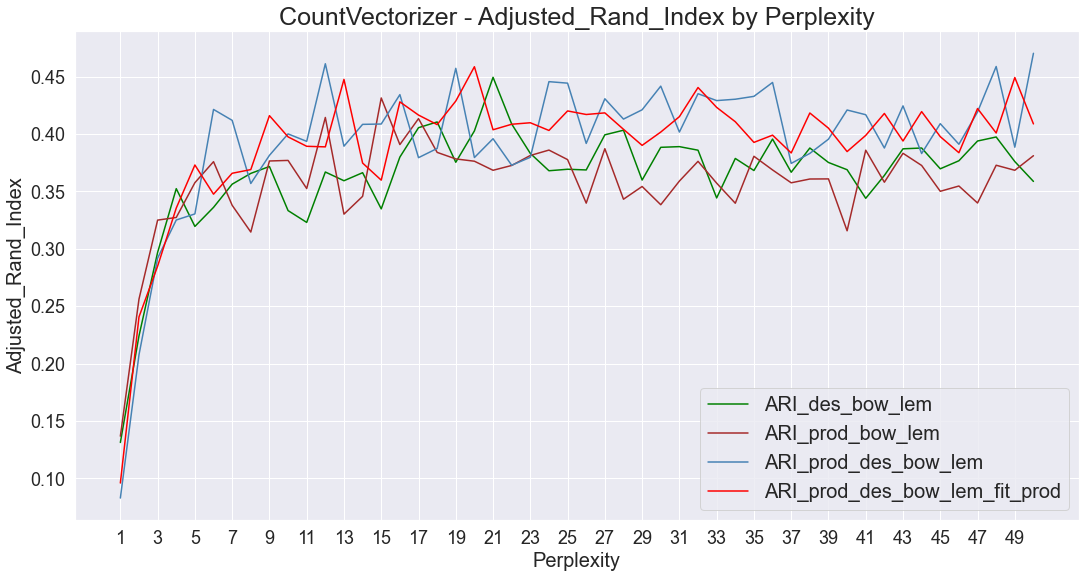

In [171]:
fig, ax = plt.subplots(figsize = (18,9))

sns.set_theme(style="darkgrid")

x = range(1, 51)
y1 = ARI_des_bow_lem
y2 = ARI_prod_bow_lem
y3 = ARI_prod_des_bow_lem
y4 = ARI_prod_des_bow_lem_fit_prod

# Plot the different metrics
ax.plot(x, y1, color = 'green', label = 'ARI_des_bow_lem')
ax.plot(x, y2, color = 'brown', label = 'ARI_prod_bow_lem')
ax.plot(x, y3, color = 'steelblue', label = 'ARI_prod_des_bow_lem')
ax.plot(x, y4, color = 'red', label = 'ARI_prod_des_bow_lem_fit_prod')

plt.yticks(size = 18)
plt.xticks(np.arange(min(range(1, 51)), max(range(1, 51)), 2.0), size = 18)

plt.xlabel("Perplexity", size = 20)
plt.ylabel("Adjusted_Rand_Index", size = 20)

plt.title('CountVectorizer - Adjusted_Rand_Index by Perplexity', size = 25)

leg = ax.legend(fontsize = 20)

plt.show()

# Bag of word - Tf-idf

In [155]:
# create bag of words (Tf-idf) for 'product_name_bow_lem' feature 
from sklearn.feature_extraction.text import TfidfVectorizer

ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'product_name_bow_lem'
ctf_fit = ctf.fit(data[feat])

ctf_transform = ctf.transform(data[feat])

In [157]:
# Execute TfidfVectorizer model with perplexity from 1 to 50 for 'product_name_bow_lem' feature
ARI_prod_bow_lem_tf = []

for perplexity in range(1, 51):
    ARI, X_tsne, labels = ARI_fct(ctf_transform, perplexity)
    ARI_prod_bow_lem_tf.append(ARI)

ARI :  0.0507 time :  5.0
ARI :  0.2058 time :  5.0
ARI :  0.2681 time :  5.0
ARI :  0.363 time :  5.0
ARI :  0.3787 time :  5.0
ARI :  0.332 time :  5.0
ARI :  0.4483 time :  5.0
ARI :  0.4359 time :  6.0
ARI :  0.443 time :  6.0
ARI :  0.407 time :  6.0
ARI :  0.5224 time :  6.0
ARI :  0.5755 time :  7.0
ARI :  0.5239 time :  5.0
ARI :  0.5986 time :  5.0
ARI :  0.4591 time :  7.0
ARI :  0.501 time :  7.0
ARI :  0.5044 time :  6.0
ARI :  0.6004 time :  6.0
ARI :  0.5183 time :  5.0
ARI :  0.5447 time :  6.0
ARI :  0.5627 time :  6.0
ARI :  0.4967 time :  6.0
ARI :  0.4289 time :  7.0
ARI :  0.4315 time :  6.0
ARI :  0.5351 time :  6.0
ARI :  0.5138 time :  6.0
ARI :  0.37 time :  6.0
ARI :  0.4821 time :  6.0
ARI :  0.4455 time :  6.0
ARI :  0.4108 time :  7.0
ARI :  0.4523 time :  7.0
ARI :  0.502 time :  7.0
ARI :  0.472 time :  7.0
ARI :  0.4582 time :  7.0
ARI :  0.4289 time :  7.0
ARI :  0.4251 time :  7.0
ARI :  0.493 time :  8.0
ARI :  0.4059 time :  8.0
ARI :  0.4669 time :  

In [158]:
fig, ax = plt.subplots(figsize = (18,9))

sns.set_theme(style="darkgrid")

x = range(1, 51)
y1 = ARI_des_bow_lem
y2 = ARI_prod_bow_lem
y3 = ARI_prod_des_bow_lem
y4 = ARI_prod_des_bow_lem_fit_prod
y5 = ARI_prod_bow_lem_tf

# Plot the different metrics
ax.plot(x, y1, color = 'green', label = 'ARI_des_bow_lem')
ax.plot(x, y2, color = 'brown', label = 'ARI_prod_bow_lem')
ax.plot(x, y3, color = 'steelblue', label = 'ARI_prod_des_bow_lem')
ax.plot(x, y4, color = 'red', label = 'ARI_prod_des_bow_lem_fit_prod')
ax.plot(x, y5, color = 'blue', label = 'ARI_prod_bow_lem_tf')

plt.yticks(size = 18)
plt.xticks(np.arange(min(range(1, 51)), max(range(1, 51)), 2.0), size = 18)

plt.xlabel("Perplexity", size = 20)
plt.ylabel("Adjusted_Rand_Index", size = 20)

plt.title('Adjusted_Rand_Index by Perplexity', size = 25)

leg = ax.legend(fontsize = 20)

plt.show()

In [159]:
# create bag of words (Tf-idf) for 'description_bow_lem' feature 
from sklearn.feature_extraction.text import TfidfVectorizer

ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'description_bow_lem'
ctf_fit = ctf.fit(data[feat])

ctf_transform = ctf.transform(data[feat])

In [160]:
# Execute TfidfVectorizer model with perplexity from 1 to 50 for 'product_name_bow_lem' feature
ARI_des_bow_lem_tf = []

for perplexity in range(1, 51):
    ARI, X_tsne, labels = ARI_fct(ctf_transform, perplexity)
    ARI_des_bow_lem_tf.append(ARI)

ARI :  0.0606 time :  6.0
ARI :  0.2838 time :  7.0
ARI :  0.2921 time :  6.0
ARI :  0.3711 time :  6.0
ARI :  0.3835 time :  6.0
ARI :  0.3804 time :  5.0
ARI :  0.4396 time :  5.0
ARI :  0.4925 time :  5.0
ARI :  0.5028 time :  5.0
ARI :  0.5471 time :  6.0
ARI :  0.5681 time :  5.0
ARI :  0.4638 time :  5.0
ARI :  0.5318 time :  6.0
ARI :  0.5537 time :  5.0
ARI :  0.5695 time :  6.0
ARI :  0.5281 time :  6.0
ARI :  0.5776 time :  6.0
ARI :  0.51 time :  6.0
ARI :  0.5698 time :  6.0
ARI :  0.5592 time :  6.0
ARI :  0.5446 time :  6.0
ARI :  0.5591 time :  6.0
ARI :  0.5193 time :  6.0
ARI :  0.5001 time :  6.0
ARI :  0.5211 time :  7.0
ARI :  0.5202 time :  6.0
ARI :  0.5156 time :  7.0
ARI :  0.5122 time :  6.0
ARI :  0.4686 time :  6.0
ARI :  0.4158 time :  8.0
ARI :  0.4281 time :  8.0
ARI :  0.4502 time :  9.0
ARI :  0.3938 time :  8.0
ARI :  0.3821 time :  8.0
ARI :  0.3724 time :  8.0
ARI :  0.4372 time :  8.0
ARI :  0.4669 time :  8.0
ARI :  0.4471 time :  7.0
ARI :  0.398 t

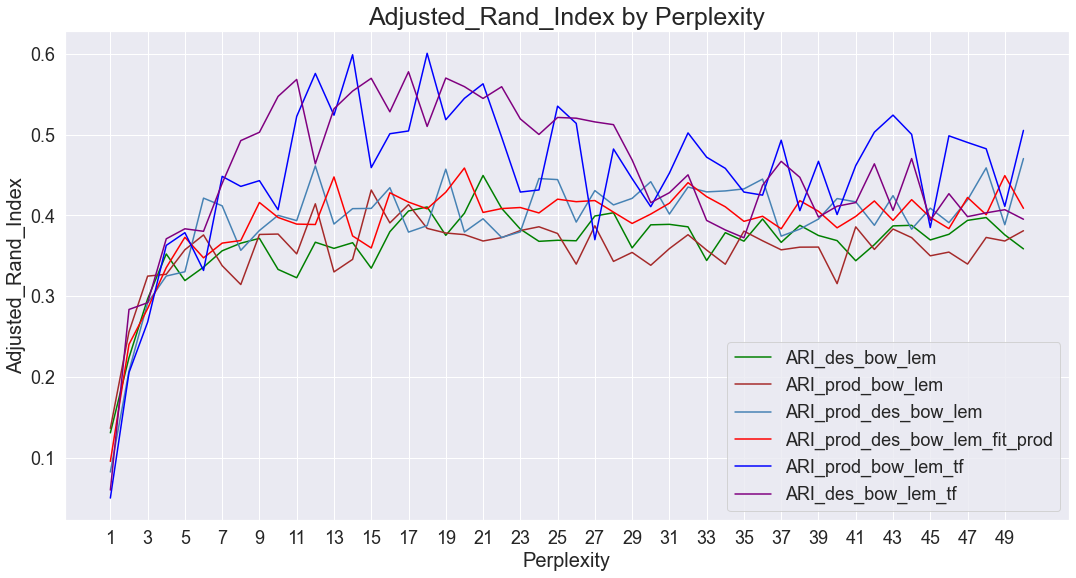

In [161]:
fig, ax = plt.subplots(figsize = (18,9))

sns.set_theme(style="darkgrid")

x = range(1, 51)
y1 = ARI_des_bow_lem
y2 = ARI_prod_bow_lem
y3 = ARI_prod_des_bow_lem
y4 = ARI_prod_des_bow_lem_fit_prod
y5 = ARI_prod_bow_lem_tf
y6 = ARI_des_bow_lem_tf

# Plot the different metrics
ax.plot(x, y1, color = 'green', label = 'ARI_des_bow_lem')
ax.plot(x, y2, color = 'brown', label = 'ARI_prod_bow_lem')
ax.plot(x, y3, color = 'steelblue', label = 'ARI_prod_des_bow_lem')
ax.plot(x, y4, color = 'red', label = 'ARI_prod_des_bow_lem_fit_prod')
ax.plot(x, y5, color = 'blue', label = 'ARI_prod_bow_lem_tf')
ax.plot(x, y6, color = 'purple', label = 'ARI_des_bow_lem_tf')

plt.yticks(size = 18)
plt.xticks(np.arange(min(range(1, 51)), max(range(1, 51)), 2.0), size = 18)

plt.xlabel("Perplexity", size = 20)
plt.ylabel("Adjusted_Rand_Index", size = 20)

plt.title('Adjusted_Rand_Index by Perplexity', size = 25)

leg = ax.legend(fontsize = 18)

plt.show()

In [162]:
# create bag of words (Tf-idf) for 'product_name_description_bow_lem' feature 
from sklearn.feature_extraction.text import TfidfVectorizer

ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'product_name_description_bow_lem'
ctf_fit = ctf.fit(data[feat])

ctf_transform = ctf.transform(data[feat])

In [163]:
# Execute TfidfVectorizer model with perplexity from 1 to 50 for 'product_name_description_bow_lem' feature
ARI_prod_des_bow_lem_tf = []

for perplexity in range(1, 51):
    ARI, X_tsne, labels = ARI_fct(ctf_transform, perplexity)
    ARI_prod_des_bow_lem_tf.append(ARI)

ARI :  0.0512 time :  5.0
ARI :  0.2335 time :  6.0
ARI :  0.4075 time :  5.0
ARI :  0.3635 time :  5.0
ARI :  0.3921 time :  6.0
ARI :  0.4139 time :  5.0
ARI :  0.489 time :  5.0
ARI :  0.461 time :  6.0
ARI :  0.4707 time :  5.0
ARI :  0.507 time :  5.0
ARI :  0.4545 time :  6.0
ARI :  0.577 time :  6.0
ARI :  0.4926 time :  5.0
ARI :  0.5399 time :  6.0
ARI :  0.5189 time :  6.0
ARI :  0.524 time :  5.0
ARI :  0.4786 time :  6.0
ARI :  0.5133 time :  6.0
ARI :  0.5513 time :  6.0
ARI :  0.5325 time :  6.0
ARI :  0.5101 time :  6.0
ARI :  0.4743 time :  6.0
ARI :  0.5657 time :  6.0
ARI :  0.5455 time :  6.0
ARI :  0.5666 time :  6.0
ARI :  0.5527 time :  6.0
ARI :  0.572 time :  6.0
ARI :  0.5214 time :  6.0
ARI :  0.5243 time :  6.0
ARI :  0.5019 time :  6.0
ARI :  0.5214 time :  7.0
ARI :  0.5386 time :  7.0
ARI :  0.4678 time :  8.0
ARI :  0.4937 time :  7.0
ARI :  0.5129 time :  7.0
ARI :  0.4866 time :  8.0
ARI :  0.4739 time :  8.0
ARI :  0.5298 time :  7.0
ARI :  0.4978 time

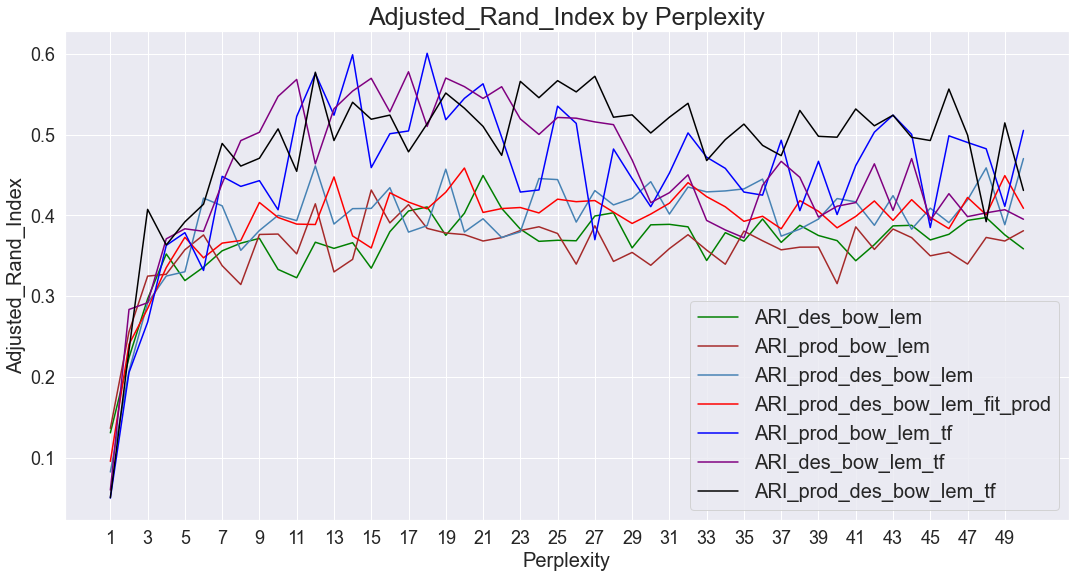

In [164]:
fig, ax = plt.subplots(figsize = (18,9))

sns.set_theme(style="darkgrid")

x = range(1, 51)
y1 = ARI_des_bow_lem
y2 = ARI_prod_bow_lem
y3 = ARI_prod_des_bow_lem
y4 = ARI_prod_des_bow_lem_fit_prod
y5 = ARI_prod_bow_lem_tf
y6 = ARI_des_bow_lem_tf
y7 = ARI_prod_des_bow_lem_tf

# Plot the different metrics
ax.plot(x, y1, color = 'green', label = 'ARI_des_bow_lem')
ax.plot(x, y2, color = 'brown', label = 'ARI_prod_bow_lem')
ax.plot(x, y3, color = 'steelblue', label = 'ARI_prod_des_bow_lem')
ax.plot(x, y4, color = 'red', label = 'ARI_prod_des_bow_lem_fit_prod')
ax.plot(x, y5, color = 'blue', label = 'ARI_prod_bow_lem_tf')
ax.plot(x, y6, color = 'purple', label = 'ARI_des_bow_lem_tf')
ax.plot(x, y7, color = 'black', label = 'ARI_prod_des_bow_lem_tf')

plt.yticks(size = 18)
plt.xticks(np.arange(min(range(1, 51)), max(range(1, 51)), 2.0), size = 18)

plt.xlabel("Perplexity", size = 20)
plt.ylabel("Adjusted_Rand_Index", size = 20)

plt.title('Adjusted_Rand_Index by Perplexity', size = 25)

leg = ax.legend(fontsize = 20)

plt.show()

In [165]:
# create bag of words (Tf-idf) for 'product_name_description_bow_lem' feature
# fit on product_name_bow_lem
from sklearn.feature_extraction.text import TfidfVectorizer

ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

ctf_fit = ctf.fit(data['product_name_bow_lem'])

ctf_transform = ctf.transform(data['product_name_description_bow_lem'])

In [166]:
# Execute TfidfVectorizer model with perplexity from 1 to 50 for 'product_name_description_bow_lem' feature
# Fit on product_name_bow_lem
ARI_prod_des_bow_lem_tf_fit_prod = []

for perplexity in range(1, 51):
    ARI, X_tsne, labels = ARI_fct(ctf_transform, perplexity)
    ARI_prod_des_bow_lem_tf_fit_prod.append(ARI)

ARI :  0.0897 time :  5.0
ARI :  0.2391 time :  5.0
ARI :  0.3326 time :  5.0
ARI :  0.3743 time :  5.0
ARI :  0.3637 time :  5.0
ARI :  0.3627 time :  6.0
ARI :  0.4533 time :  5.0
ARI :  0.4555 time :  5.0
ARI :  0.5497 time :  6.0
ARI :  0.5375 time :  6.0
ARI :  0.5284 time :  6.0
ARI :  0.538 time :  6.0
ARI :  0.489 time :  6.0
ARI :  0.5054 time :  6.0
ARI :  0.5224 time :  6.0
ARI :  0.5511 time :  6.0
ARI :  0.5484 time :  6.0
ARI :  0.5418 time :  6.0
ARI :  0.524 time :  6.0
ARI :  0.5282 time :  6.0
ARI :  0.5461 time :  6.0
ARI :  0.4997 time :  6.0
ARI :  0.54 time :  6.0
ARI :  0.5147 time :  6.0
ARI :  0.5178 time :  6.0
ARI :  0.5254 time :  6.0
ARI :  0.5367 time :  6.0
ARI :  0.5171 time :  7.0
ARI :  0.4643 time :  7.0
ARI :  0.4836 time :  7.0
ARI :  0.4759 time :  7.0
ARI :  0.4284 time :  7.0
ARI :  0.5139 time :  8.0
ARI :  0.5117 time :  7.0
ARI :  0.5396 time :  7.0
ARI :  0.4492 time :  8.0
ARI :  0.4602 time :  8.0
ARI :  0.4444 time :  7.0
ARI :  0.4963 tim

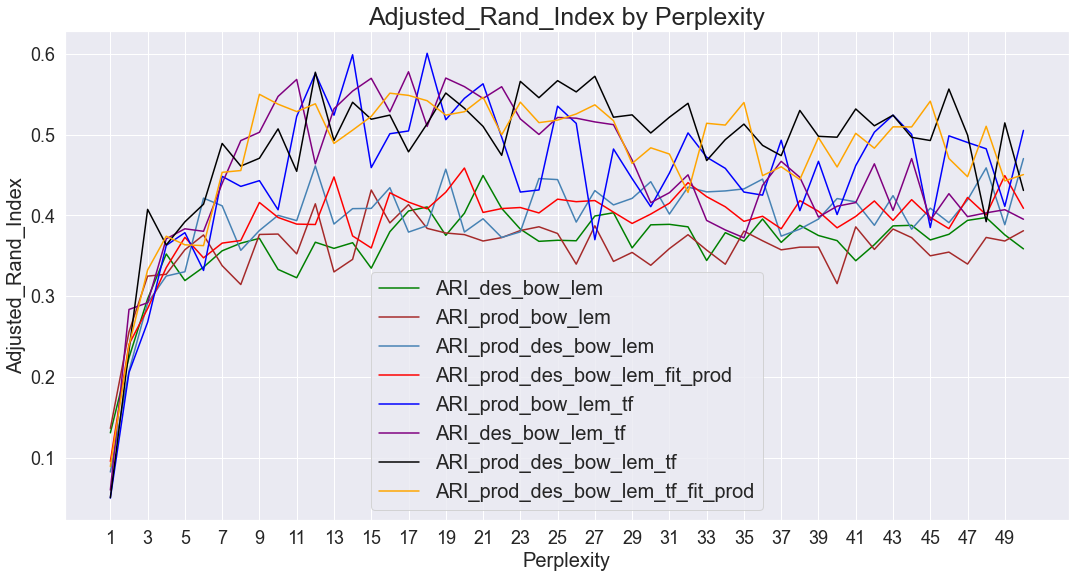

In [168]:
fig, ax = plt.subplots(figsize = (18,9))

sns.set_theme(style="darkgrid")

x = range(1, 51)
y1 = ARI_des_bow_lem
y2 = ARI_prod_bow_lem
y3 = ARI_prod_des_bow_lem
y4 = ARI_prod_des_bow_lem_fit_prod
y5 = ARI_prod_bow_lem_tf
y6 = ARI_des_bow_lem_tf
y7 = ARI_prod_des_bow_lem_tf
y8 = ARI_prod_des_bow_lem_tf_fit_prod

# Plot the different metrics
ax.plot(x, y1, color = 'green', label = 'ARI_des_bow_lem')
ax.plot(x, y2, color = 'brown', label = 'ARI_prod_bow_lem')
ax.plot(x, y3, color = 'steelblue', label = 'ARI_prod_des_bow_lem')
ax.plot(x, y4, color = 'red', label = 'ARI_prod_des_bow_lem_fit_prod')
ax.plot(x, y5, color = 'blue', label = 'ARI_prod_bow_lem_tf')
ax.plot(x, y6, color = 'purple', label = 'ARI_des_bow_lem_tf')
ax.plot(x, y7, color = 'black', label = 'ARI_prod_des_bow_lem_tf')
ax.plot(x, y8, color = 'orange', label = 'ARI_prod_des_bow_lem_tf_fit_prod')

plt.yticks(size = 18)
plt.xticks(np.arange(min(range(1, 51)), max(range(1, 51)), 2.0), size = 18)

plt.xlabel("Perplexity", size = 20)
plt.ylabel("Adjusted_Rand_Index", size = 20)

plt.title('Adjusted_Rand_Index by Perplexity', size = 25)

leg = ax.legend(fontsize = 20)

plt.show()

In [170]:
fig, ax = plt.subplots(figsize = (18,9))

sns.set_theme(style="darkgrid")

x = range(1, 51)
y5 = ARI_prod_bow_lem_tf
y6 = ARI_des_bow_lem_tf
y7 = ARI_prod_des_bow_lem_tf
y8 = ARI_prod_des_bow_lem_tf_fit_prod

# Plot the different metrics
ax.plot(x, y5, color = 'blue', label = 'ARI_prod_bow_lem_tf')
ax.plot(x, y6, color = 'purple', label = 'ARI_des_bow_lem_tf')
ax.plot(x, y7, color = 'black', label = 'ARI_prod_des_bow_lem_tf')
ax.plot(x, y8, color = 'orange', label = 'ARI_prod_des_bow_lem_tf_fit_prod')

plt.yticks(size = 18)
plt.xticks(np.arange(min(range(1, 51)), max(range(1, 51)), 2.0), size = 18)

plt.xlabel("Perplexity", size = 20)
plt.ylabel("Adjusted_Rand_Index", size = 20)

plt.title('tf-idf - Adjusted_Rand_Index by Perplexity', size = 25)

leg = ax.legend(fontsize = 20)

plt.show()

In [184]:
# DISPLAY BEST RESULTS CLUSTERING

# create bag of words (Tf-idf) for 'product_name_bow_lem' feature 
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'product_name_bow_lem'
ctf_fit = ctf.fit(data[feat])

ctf_transform = ctf.transform(data[feat])

# Execute TfidfVectorizer model with perplexity 18 (argmax) for 'product_name_bow_lem' feature
ARI, X_tsne, labels = ARI_fct(ctf_transform, 18)

# tSNE vizualisation
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

ARI :  0.6004 time :  6.0


ARI :  0.6004


In [174]:
# Create dataframe with results
dict_results = {'perplexity': range(1,51),
                'ARI_des_bow_lem': ARI_des_bow_lem,
                'ARI_prod_bow_lem': ARI_prod_bow_lem,
                'ARI_prod_des_bow_lem': ARI_prod_des_bow_lem,
                "ARI_prod_des_bow_lem_fit_prod": ARI_prod_des_bow_lem_fit_prod,
                'ARI_prod_bow_lem_tf': ARI_prod_bow_lem_tf,
               'ARI_des_bow_lem_tf' : ARI_des_bow_lem_tf,
               'ARI_prod_des_bow_lem_tf' : ARI_prod_des_bow_lem_tf,
               'ARI_prod_des_bow_lem_tf_fit_prod' : ARI_prod_des_bow_lem_tf_fit_prod}
df_results = pd.DataFrame(dict_results)
df_results

perplexity  ARI_des_bow_lem  ARI_prod_bow_lem  ARI_prod_des_bow_lem  \
0            1           0.1313            0.1368                0.0829   
1            2           0.2242            0.2562                0.2077   
2            3           0.2969            0.3250                0.2919   
3            4           0.3524            0.3273                0.3251   
4            5           0.3195            0.3576                0.3304   
5            6           0.3361            0.3759                0.4214   
6            7           0.3563            0.3379                0.4119   
7            8           0.3657            0.3146                0.3569   
8            9           0.3717            0.3765                0.3814   
9           10           0.3333            0.3770                0.4001   
10          11           0.3230            0.3525                0.3936   
11          12           0.3669            0.4144                0.4612   
12          13           0.3593            0.3302                0.3894   
13          14           0.3663            0.3457                0.4084   
14          15           0.3348            0.4314                0.4087   
15          16           0.3799            0.3908                0.4343   
16          17           0.4055            0.4134                0.3794   
17          18           0.4105            0.3840                0.3874   
18          19           0.3754            0.3783                0.4572   
19          20           0.4027            0.3763                0.3795   
20          21           0.4494            0.3684                0.3959   
21          22           0.4087            0.3726                0.3728   
22          23           0.3831            0.3813                0.3797   
23          24           0.3680            0.3860                0.4456   
24          25           0.3693            0.3777                0.4443   
25          26           0.3687            0.3398                0.3918   
26          27           0.3993            0.3872                0.4307   
27          28           0.4033            0.3432                0.4130   
28          29           0.3599            0.3543                0.4211   
29          30           0.3884            0.3384                0.4417   
30          31           0.3890            0.3590                0.4017   
31          32           0.3859            0.3762                0.4351   
32          33           0.3443            0.3572                0.4291   
33          34           0.3787            0.3397                0.4303   
34          35           0.3682            0.3806                0.4328   
35          36           0.3956            0.3687                0.4449   
36          37           0.3667            0.3575                0.3744   
37          38           0.3878            0.3608                0.3831   
38          39           0.3752            0.3609                0.3955   
39          40           0.3689            0.3157                0.4209   
40          41           0.3440            0.3859                0.4168   
41          42           0.3639            0.3580                0.3878   
42          43           0.3871            0.3832                0.4245   
43          44           0.3878            0.3726                0.3830   
44          45           0.3697            0.3501                0.4090   
45          46           0.3767            0.3547                0.3911   
46          47           0.3939            0.3399                0.4192   
47          48           0.3974            0.3728                0.4588   
48          49           0.3760            0.3684                0.3885   
49          50           0.3587            0.3811                0.4703   

    ARI_prod_des_bow_lem_fit_prod  ARI_prod_bow_lem_tf  ARI_des_bow_lem_tf  \
0                          0.0960               0.0507              0.0606   
1                     

### Tf-idf with 62 clusters (second categories)

In [190]:
# Create labels for first_category
l_cat_2 = list(set(data['second_category']))
print("sous-catégories : ", l_cat_2)
y_cat_num_2 = [(61-l_cat_2.index(data.iloc[i]['second_category'])) for i in range(len(data))]

sous-catégories :  ['Kitchen & Dining >> Dinnerware & Crockery', 'Kitchen & Dining >> Kitchen Tools', "Beauty and Personal Care >> Men's Grooming", 'Beauty and Personal Care >> Health Care', 'Baby Care >> Baby Grooming', 'Kitchen & Dining >> Consumables & Disposables', 'Beauty and Personal Care >> Hair Care', 'Beauty and Personal Care >> Makeup', 'Home Furnishing >> Bath Linen', 'Computers >> Software', 'Computers >> Computer Peripherals', 'Beauty and Personal Care >> Eye Care', 'Home Furnishing >> Cushions, Pillows & Covers', 'Baby Care >> Baby Bath & Skin', 'Kitchen & Dining >> Containers & Bottles', 'Home Furnishing >> JMD Home Furnishing', 'Computers >> Laptops', 'Kitchen & Dining >> Lighting', 'Computers >> Tablet Accessories', 'Home Decor & Festive Needs >> Decorative Lighting & Lamps', 'Baby Care >> Baby & Kids Gifts', 'Baby Care >> Diapering & Potty Training', 'Kitchen & Dining >> Coffee Mugs', 'Computers >> Network Components', 'Kitchen & Dining >> Bar & Glassware', 'Baby Care

In [191]:
y_cat_num_2

[13,
 48,
 48,
 18,
 18,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 18,
 53,
 22,
 8,
 44,
 46,
 2,
 14,
 2,
 55,
 39,
 39,
 39,
 38,
 39,
 55,
 39,
 43,
 7,
 32,
 32,
 32,
 54,
 24,
 24,
 24,
 24,
 24,
 54,
 6,
 39,
 39,
 19,
 10,
 47,
 47,
 56,
 10,
 47,
 2,
 2,
 2,
 54,
 54,
 0,
 2,
 26,
 33,
 19,
 2,
 27,
 26,
 7,
 52,
 10,
 4,
 4,
 4,
 4,
 4,
 4,
 33,
 33,
 33,
 54,
 54,
 54,
 33,
 33,
 18,
 18,
 18,
 30,
 18,
 18,
 18,
 2,
 42,
 2,
 47,
 57,
 51,
 33,
 2,
 4,
 32,
 49,
 2,
 28,
 26,
 58,
 31,
 31,
 31,
 33,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 60,
 4,
 4,
 4,
 4,
 60,
 4,
 60,
 4,
 4,
 2,
 4,
 60,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


In [200]:
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_2_fct(features, perplexity) :
    time1 = time.time()
    num_labels=len(l_cat_2)
    tsne = manifold.TSNE(n_components=2, perplexity=perplexity, n_iter=2000,
                         init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num_2, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_2_visu_fct(X_tsne, y_cat_num_2, labels, ARI) :
    fig = plt.figure(figsize=(18,7))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num_2, cmap='hsv')
    plt.title('Représentation des descriptions par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='hsv')
    plt.title('Représentation des descriptions par clusters')
    
    plt.show()
    print("ARI : ", ARI)

ARI :  0.3246 time :  8.0


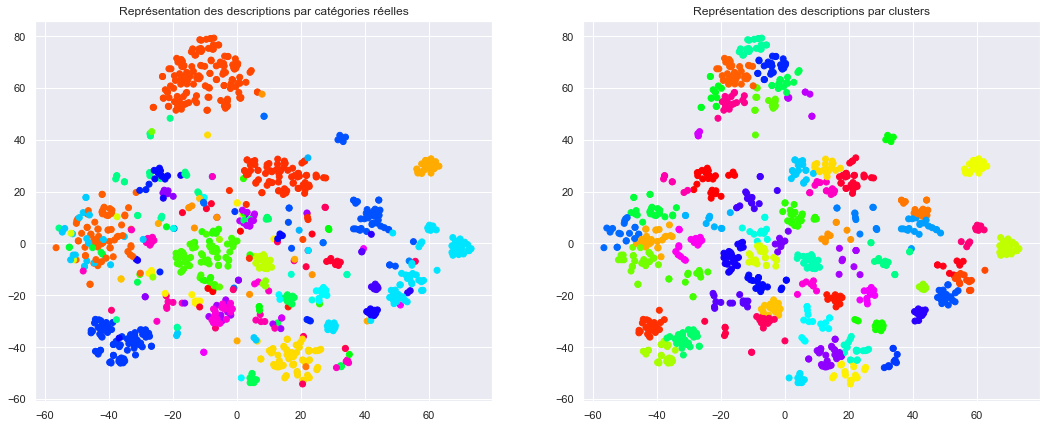

ARI :  0.3246


In [201]:
# DISPLAY BEST RESULTS CLUSTERING

# create bag of words (Tf-idf) for 'product_name_bow_lem' feature 
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'product_name_bow_lem'
ctf_fit = ctf.fit(data[feat])

ctf_transform = ctf.transform(data[feat])

# Execute TfidfVectorizer model with perplexity 20 for 'product_name_bow_lem' feature
ARI, X_tsne, labels = ARI_2_fct(ctf_transform, 20)

# tSNE vizualisation
TSNE_2_visu_fct(X_tsne, y_cat_num_2, labels, ARI)

ARI :  0.3135 time :  10.0


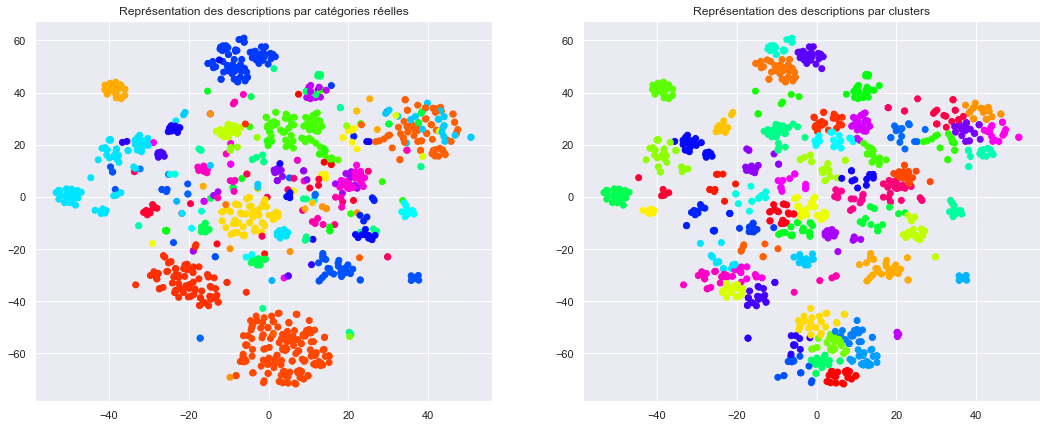

ARI :  0.3135


In [202]:
# DISPLAY BEST RESULTS CLUSTERING

# create bag of words (Tf-idf) for 'product_name_bow_lem' feature 
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'product_name_bow_lem'
ctf_fit = ctf.fit(data[feat])

ctf_transform = ctf.transform(data[feat])

# Execute TfidfVectorizer model with perplexity 30 for 'product_name_bow_lem' feature
ARI, X_tsne, labels = ARI_2_fct(ctf_transform, 30)

# tSNE vizualisation
TSNE_2_visu_fct(X_tsne, y_cat_num_2, labels, ARI)

In [203]:
# DISPLAY BEST RESULTS CLUSTERING

# create bag of words (Tf-idf) for 'product_name_bow_lem' feature 
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'product_name_bow_lem'
ctf_fit = ctf.fit(data[feat])

ctf_transform = ctf.transform(data[feat])

# Execute TfidfVectorizer model with perplexity 40 for 'product_name_bow_lem' feature
ARI, X_tsne, labels = ARI_2_fct(ctf_transform, 40)

# tSNE vizualisation
TSNE_2_visu_fct(X_tsne, y_cat_num_2, labels, ARI)

ARI :  0.3041 time :  12.0


ARI :  0.3041


ARI :  0.3173 time :  9.0


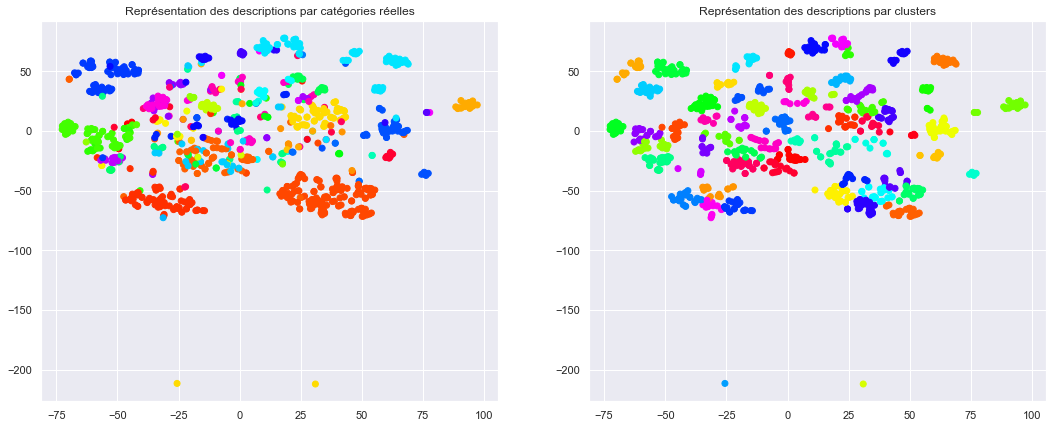

ARI :  0.3173


In [204]:
# DISPLAY BEST RESULTS CLUSTERING

# create bag of words (Tf-idf) for 'product_name_bow_lem' feature 
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'product_name_bow_lem'
ctf_fit = ctf.fit(data[feat])

ctf_transform = ctf.transform(data[feat])

# Execute TfidfVectorizer model with perplexity 10 for 'product_name_bow_lem' feature
ARI, X_tsne, labels = ARI_2_fct(ctf_transform, 10)

# tSNE vizualisation
TSNE_2_visu_fct(X_tsne, y_cat_num_2, labels, ARI)

## Word2Vec

In [286]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

## Create Word2Vec model

In [287]:
from nltk.tokenize import sent_tokenize, word_tokenize

data['length_bow_lem'] = data['description_bow_lem'].apply(lambda x : len(word_tokenize(x)))
print("max length bow lem : ", data['length_bow_lem'].max())

max length bow lem :  181


In [288]:
w2v_size=1000
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 185 # adapt to length of sentences
descriptions = data['description_bow_lem'].to_list()
descriptions = [gensim.utils.simple_preprocess(text) for text in descriptions]

In [289]:
descriptions

[['key',
  'elegance',
  'polyester',
  'multicolor',
  'abstract',
  'eyelet',
  'door',
  'curtain',
  'floral',
  'height',
  'pack',
  'enhances',
  'look',
  'interior',
  'high',
  'fabric',
  'style',
  'stitch',
  'metal',
  'ring',
  'make',
  'room',
  'environment',
  'romantic',
  'loving',
  'ant',
  'wrinkle',
  'anti',
  'shrinkage',
  'elegant',
  'apparance',
  'give',
  'home',
  'bright',
  'modernistic',
  'appeal',
  'design',
  'surreal',
  'attention',
  'sure',
  'steal',
  'heart',
  'contemporary',
  'valance',
  'slide',
  'smoothly',
  'draw',
  'apart',
  'first',
  'thing',
  'morning',
  'welcome',
  'sun',
  'ray',
  'want',
  'wish',
  'good',
  'whole',
  'world',
  'close',
  'evening',
  'create',
  'special',
  'moment',
  'joyous',
  'beauty',
  'given',
  'soothing',
  'print',
  'bring',
  'softly',
  'filter',
  'light',
  'get',
  'right',
  'amount',
  'sunlight',
  'designed',
  'model',
  'name',
  'set',
  'duster',
  'length',
  'box',
  '

In [290]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, 
                                   window=w2v_window,
                                   vector_size=w2v_size,
                                   seed=42,
                                   workers=1)
                                    # workers=multiprocessing.cpu_count())
w2v_model.build_vocab(descriptions)
w2v_model.train(descriptions, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 4607
Word2Vec trained


In [291]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(descriptions)
x_descriptions = pad_sequences(tokenizer.texts_to_sequences(descriptions),
                               maxlen=maxlen,
                               padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 4608


## Création de la matrice d'embedding

In [292]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (4608, 1000)


## Création du modèle d'embedding

In [293]:
# Création du modèle

input=Input(shape=(len(x_descriptions),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 185)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 185, 1000)         4608000   
                                                                 
 global_average_pooling1d_4   (None, 1000)             0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 4,608,000
Trainable params: 4,608,000
Non-trainable params: 0
_________________________________________________________________


## Exécution du modèle

In [294]:
embeddings = embed_model.predict(x_descriptions)
embeddings.shape

(1050, 1000)

In [295]:
# Execute Word2Vec embedding model with perplexity between 5 and 50
print("Word2Vec embedding : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(embeddings, 5)
ARI, X_tsne, labels = ARI_fct(embeddings, 10)
ARI, X_tsne, labels = ARI_fct(embeddings, 15)
ARI, X_tsne, labels = ARI_fct(embeddings, 20)
ARI, X_tsne, labels = ARI_fct(embeddings, 25)
ARI, X_tsne, labels = ARI_fct(embeddings, 30)
ARI, X_tsne, labels = ARI_fct(embeddings, 35)
ARI, X_tsne, labels = ARI_fct(embeddings, 40)
ARI, X_tsne, labels = ARI_fct(embeddings, 45)
ARI, X_tsne, labels = ARI_fct(embeddings, 50)

Word2Vec embedding : 
--------
ARI :  0.2721 time :  5.0
ARI :  0.3499 time :  5.0
ARI :  0.3969 time :  5.0
ARI :  0.3688 time :  6.0
ARI :  0.4302 time :  6.0
ARI :  0.3372 time :  5.0
ARI :  0.3502 time :  7.0
ARI :  0.3962 time :  7.0
ARI :  0.3913 time :  9.0
ARI :  0.3647 time :  7.0


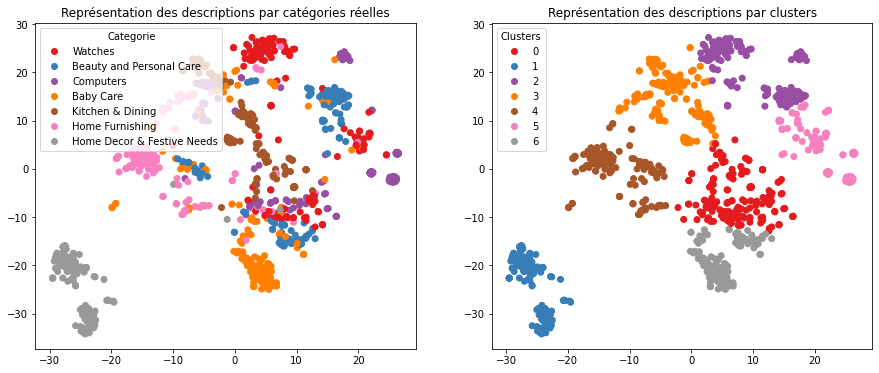

ARI :  0.3647


In [296]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

Word2Vec embedding : 
--------
ARI :  0.4302 time :  6.0


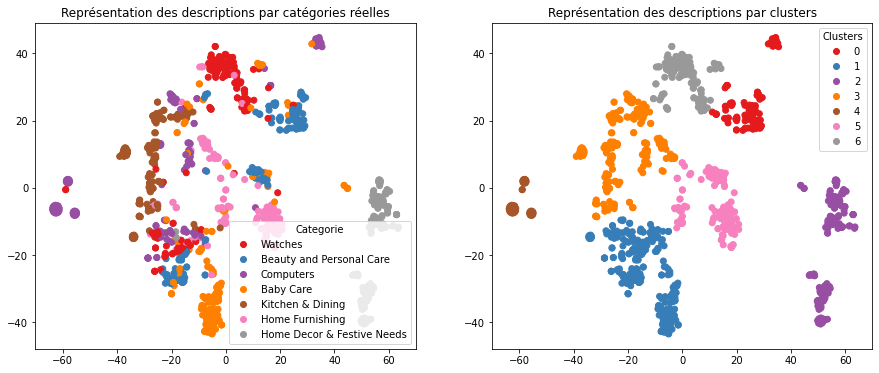

ARI :  0.4302


In [297]:
# Execute Word2Vec embedding model with perplexity between 5 and 50
print("Word2Vec embedding : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(embeddings, 25)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# BERT

In [298]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers

os.environ["TF_KERAS"]='1'

In [299]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.8.0
2.8.0
Num GPUs Available:  0
True


In [316]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step == 0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

## BERT HuggingFace

In [317]:
data['length_dl'] = data['description_dl'].apply(lambda x : len(word_tokenize(x)))
print("max length dl : ", data['length_dl'].max())

max length dl :  636


### 'bert-base-uncased'

In [330]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
descriptions = data['description_dl'].to_list()

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at C:\Users\33624/.cache\huggingface\transformers\3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.17.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file https://huggingface.co/bert-base-u

In [331]:
# Création des features
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, descriptions, 
                                                         max_length, batch_size, mode='HF')

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at C:\Users\33624/.cache\huggingface\transformers\3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.17.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file https://huggingface.co/bert-base-uncased/r

temps traitement :  76.0


In [332]:
ARI, X_tsne, labels = ARI_fct(features_bert, 5)
ARI, X_tsne, labels = ARI_fct(features_bert, 10)
ARI, X_tsne, labels = ARI_fct(features_bert, 15)
ARI, X_tsne, labels = ARI_fct(features_bert, 20)
ARI, X_tsne, labels = ARI_fct(features_bert, 25)
ARI, X_tsne, labels = ARI_fct(features_bert, 30)
ARI, X_tsne, labels = ARI_fct(features_bert, 35)
ARI, X_tsne, labels = ARI_fct(features_bert, 40)
ARI, X_tsne, labels = ARI_fct(features_bert, 45)
ARI, X_tsne, labels = ARI_fct(features_bert, 50)

ARI :  0.3532 time :  5.0
ARI :  0.3347 time :  5.0
ARI :  0.3465 time :  5.0
ARI :  0.3726 time :  6.0
ARI :  0.3305 time :  6.0
ARI :  0.3178 time :  6.0
ARI :  0.3271 time :  7.0
ARI :  0.3223 time :  7.0
ARI :  0.3175 time :  8.0
ARI :  0.3174 time :  8.0


In [ ]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### 'cardiffnlp/twitter-roberta-base-sentiment'
* Modèle pré-entraîné sur des tweets pour l'analyse de sentiment

In [333]:
max_length = 64
batch_size = 10
model_type = 'cardiffnlp/twitter-roberta-base-sentiment'
model = TFAutoModel.from_pretrained(model_type)
descriptions = data['description_dl'].to_list()

https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/config.json not found in cache or force_download set to True, downloading to C:\Users\33624\.cache\huggingface\transformers\tmppyaxuwmb


Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

storing https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/config.json in cache at C:\Users\33624/.cache\huggingface\transformers\7dd97280b5338fb674b5372829a05a1aaaa76f9f2fa71c36199f2ce1ee1104a0.4c7ca95b4fd82b8bbe94fde253f5f82e5a4eedefe6f86f6fa79efc903d6cfe60
creating metadata file for C:\Users\33624/.cache\huggingface\transformers\7dd97280b5338fb674b5372829a05a1aaaa76f9f2fa71c36199f2ce1ee1104a0.4c7ca95b4fd82b8bbe94fde253f5f82e5a4eedefe6f86f6fa79efc903d6cfe60
loading configuration file https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/config.json from cache at C:\Users\33624/.cache\huggingface\transformers\7dd97280b5338fb674b5372829a05a1aaaa76f9f2fa71c36199f2ce1ee1104a0.4c7ca95b4fd82b8bbe94fde253f5f82e5a4eedefe6f86f6fa79efc903d6cfe60
Model config RobertaConfig {
  "_name_or_path": "cardiffnlp/twitter-roberta-base-sentiment",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "b

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

storing https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/tf_model.h5 in cache at C:\Users\33624/.cache\huggingface\transformers\e49267cd200a05d51395363810b08d06020ef3372d24c5f2074196dfe16b7ddf.18f92286c4570bfff456286f111b772bf98552a1625d563f88dce63134c802de.h5
creating metadata file for C:\Users\33624/.cache\huggingface\transformers\e49267cd200a05d51395363810b08d06020ef3372d24c5f2074196dfe16b7ddf.18f92286c4570bfff456286f111b772bf98552a1625d563f88dce63134c802de.h5
loading weights file https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/tf_model.h5 from cache at C:\Users\33624/.cache\huggingface\transformers\e49267cd200a05d51395363810b08d06020ef3372d24c5f2074196dfe16b7ddf.18f92286c4570bfff456286f111b772bf98552a1625d563f88dce63134c802de.h5
Some layers from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment were not used when initializing TFRobertaModel: ['classifier']
- This IS expected if you are initializing TFRoberta

In [335]:
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, descriptions, 
                                                         max_length, batch_size, mode='HF')

Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/config.json from cache at C:\Users\33624/.cache\huggingface\transformers\7dd97280b5338fb674b5372829a05a1aaaa76f9f2fa71c36199f2ce1ee1104a0.4c7ca95b4fd82b8bbe94fde253f5f82e5a4eedefe6f86f6fa79efc903d6cfe60
Model config RobertaConfig {
  "_name_or_path": "cardiffnlp/twitter-roberta-base-sentiment",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "laye

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

storing https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/vocab.json in cache at C:\Users\33624/.cache\huggingface\transformers\089d0f043cfdb86b4f4d79238552b1dcd5b791d4be7c48f27bd7323bdbb7c599.647b4548b6d9ea817e82e7a9231a320231a1c9ea24053cc9e758f3fe68216f05
creating metadata file for C:\Users\33624/.cache\huggingface\transformers\089d0f043cfdb86b4f4d79238552b1dcd5b791d4be7c48f27bd7323bdbb7c599.647b4548b6d9ea817e82e7a9231a320231a1c9ea24053cc9e758f3fe68216f05
https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/merges.txt not found in cache or force_download set to True, downloading to C:\Users\33624\.cache\huggingface\transformers\tmpj10gz5jm


Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

storing https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/merges.txt in cache at C:\Users\33624/.cache\huggingface\transformers\45449f1b6476a9fe84f9eade7f45745cdea8af6b3735f760d8bb0f4b71adf57f.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
creating metadata file for C:\Users\33624/.cache\huggingface\transformers\45449f1b6476a9fe84f9eade7f45745cdea8af6b3735f760d8bb0f4b71adf57f.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b
https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/special_tokens_map.json not found in cache or force_download set to True, downloading to C:\Users\33624\.cache\huggingface\transformers\tmpz95l18au


Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

storing https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/special_tokens_map.json in cache at C:\Users\33624/.cache\huggingface\transformers\5d7665586d1ae04ace347574fee8f19ad7875acf296e81464f2fb0bb70c0c404.0dc5b1041f62041ebbd23b1297f2f573769d5c97d8b7c28180ec86b8f6185aa8
creating metadata file for C:\Users\33624/.cache\huggingface\transformers\5d7665586d1ae04ace347574fee8f19ad7875acf296e81464f2fb0bb70c0c404.0dc5b1041f62041ebbd23b1297f2f573769d5c97d8b7c28180ec86b8f6185aa8
loading file https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/vocab.json from cache at C:\Users\33624/.cache\huggingface\transformers\089d0f043cfdb86b4f4d79238552b1dcd5b791d4be7c48f27bd7323bdbb7c599.647b4548b6d9ea817e82e7a9231a320231a1c9ea24053cc9e758f3fe68216f05
loading file https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment/resolve/main/merges.txt from cache at C:\Users\33624/.cache\huggingface\transformers\45449f1b6476a9fe84f9eade7f45745cdea8af6b3

temps traitement :  76.0


In [336]:
ARI, X_tsne, labels = ARI_fct(features_bert, 5)
ARI, X_tsne, labels = ARI_fct(features_bert, 10)
ARI, X_tsne, labels = ARI_fct(features_bert, 15)
ARI, X_tsne, labels = ARI_fct(features_bert, 20)
ARI, X_tsne, labels = ARI_fct(features_bert, 25)
ARI, X_tsne, labels = ARI_fct(features_bert, 30)
ARI, X_tsne, labels = ARI_fct(features_bert, 35)
ARI, X_tsne, labels = ARI_fct(features_bert, 40)
ARI, X_tsne, labels = ARI_fct(features_bert, 45)
ARI, X_tsne, labels = ARI_fct(features_bert, 50)

ARI :  0.1905 time :  5.0
ARI :  0.1478 time :  5.0
ARI :  0.1494 time :  5.0
ARI :  0.2215 time :  5.0
ARI :  0.224 time :  6.0
ARI :  0.2191 time :  6.0
ARI :  0.224 time :  6.0
ARI :  0.2219 time :  7.0
ARI :  0.2181 time :  7.0
ARI :  0.2193 time :  7.0


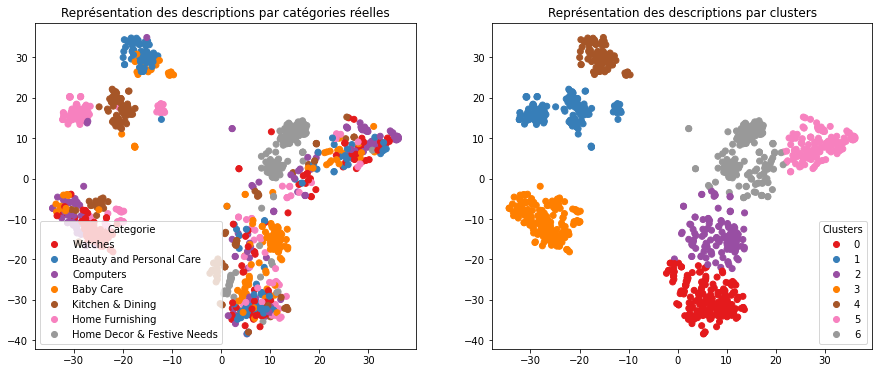

ARI :  0.2193


In [337]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## BERT hub Tensorflow

In [322]:
import tensorflow_hub as hub
import tensorflow_text 

# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [324]:
descriptions = data['description_dl'].to_list()

In [327]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, descriptions, 
                                                         max_length, batch_size, mode='TFhub')

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at C:\Users\33624/.cache\huggingface\transformers\3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.17.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file https://huggingface.co/bert-base-uncased/r

temps traitement :  73.0


In [328]:
ARI, X_tsne, labels = ARI_fct(features_bert, 5)
ARI, X_tsne, labels = ARI_fct(features_bert, 10)
ARI, X_tsne, labels = ARI_fct(features_bert, 15)
ARI, X_tsne, labels = ARI_fct(features_bert, 20)
ARI, X_tsne, labels = ARI_fct(features_bert, 25)
ARI, X_tsne, labels = ARI_fct(features_bert, 30)
ARI, X_tsne, labels = ARI_fct(features_bert, 35)
ARI, X_tsne, labels = ARI_fct(features_bert, 40)
ARI, X_tsne, labels = ARI_fct(features_bert, 45)
ARI, X_tsne, labels = ARI_fct(features_bert, 50)

ARI :  0.3158 time :  5.0
ARI :  0.3463 time :  5.0
ARI :  0.3605 time :  5.0
ARI :  0.3631 time :  6.0
ARI :  0.3257 time :  6.0
ARI :  0.313 time :  6.0
ARI :  0.3219 time :  7.0
ARI :  0.3174 time :  7.0
ARI :  0.32 time :  7.0
ARI :  0.3228 time :  8.0


ARI :  0.3631 time :  5.0


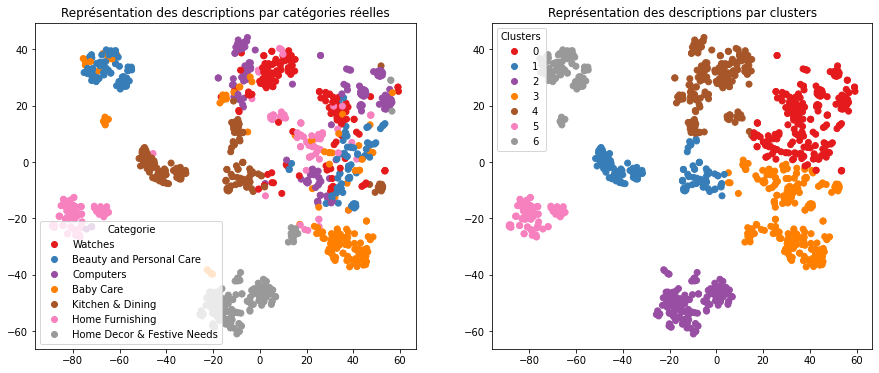

ARI :  0.3631


In [329]:
ARI, X_tsne, labels = ARI_fct(features_bert, 20)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# USE - Universal Sentence Encoder

In [308]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [309]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [310]:
batch_size = 10
descriptions = data['description_dl'].to_list()

In [311]:
features_USE = feature_USE_fct(descriptions, batch_size)

In [313]:
ARI, X_tsne, labels = ARI_fct(features_USE, 10)
ARI, X_tsne, labels = ARI_fct(features_USE, 20)
ARI, X_tsne, labels = ARI_fct(features_USE, 30)
ARI, X_tsne, labels = ARI_fct(features_USE, 40)
ARI, X_tsne, labels = ARI_fct(features_USE, 50)

ARI :  0.3464 time :  5.0
ARI :  0.4433 time :  5.0
ARI :  0.429 time :  6.0
ARI :  0.415 time :  7.0
ARI :  0.4183 time :  8.0


In [314]:
ARI, X_tsne, labels = ARI_fct(features_USE, 10)
ARI, X_tsne, labels = ARI_fct(features_USE, 15)
ARI, X_tsne, labels = ARI_fct(features_USE, 20)
ARI, X_tsne, labels = ARI_fct(features_USE, 25)
ARI, X_tsne, labels = ARI_fct(features_USE, 30)
ARI, X_tsne, labels = ARI_fct(features_USE, 35)
ARI, X_tsne, labels = ARI_fct(features_USE, 40)
ARI, X_tsne, labels = ARI_fct(features_USE, 45)
ARI, X_tsne, labels = ARI_fct(features_USE, 50)

ARI :  0.3464 time :  5.0
ARI :  0.4335 time :  5.0
ARI :  0.4433 time :  5.0
ARI :  0.4476 time :  6.0
ARI :  0.429 time :  7.0
ARI :  0.4206 time :  7.0
ARI :  0.415 time :  7.0
ARI :  0.421 time :  8.0
ARI :  0.4183 time :  8.0


In [315]:
ARI, X_tsne, labels = ARI_fct(features_USE, 25)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

ARI :  0.4476 time :  5.0


ARI :  0.4476
